# Background
Hospital readmission for diabetic patients is a significant concern in the United States due to the increasing prevalence of diabetes and its associated complications.There's an urgent need for effective interventions and strategies to reduce hospital readmissions and improve the quality of care for diabetic patients in the U.S. healthcare system. Additionally, reducing readmission rates for diabetic patients has a great potential to reduce medical cost significantly. 


This project aims to help a group of hospitals to better understand diabetic patient readmissions. The hospitals gave access to ten years of information on diabetic patients readmitted to the hospital after being discharged. The doctors want to assess if initial diagnoses, number of procedures, or other variables could help them better understand the probability of readmiss

Business questions: How to identify patients with high probability of readmission based on initial diagnoses, number of procedures, and other variables?

Data questions:

*   Does diabetes play a central role in readmission?
*   On what groups of patients should the hospital focus their follow-up efforts to better monitor patients with a high probability of readmission?



#Dataset Description 

* Collected from 130 hospitals in the U.S. during 10 years(1999-2008)
* Contains 101,766 observations and 50 features
* The following table shows a quick overview of the features' name, types, discription and percentage of missing values

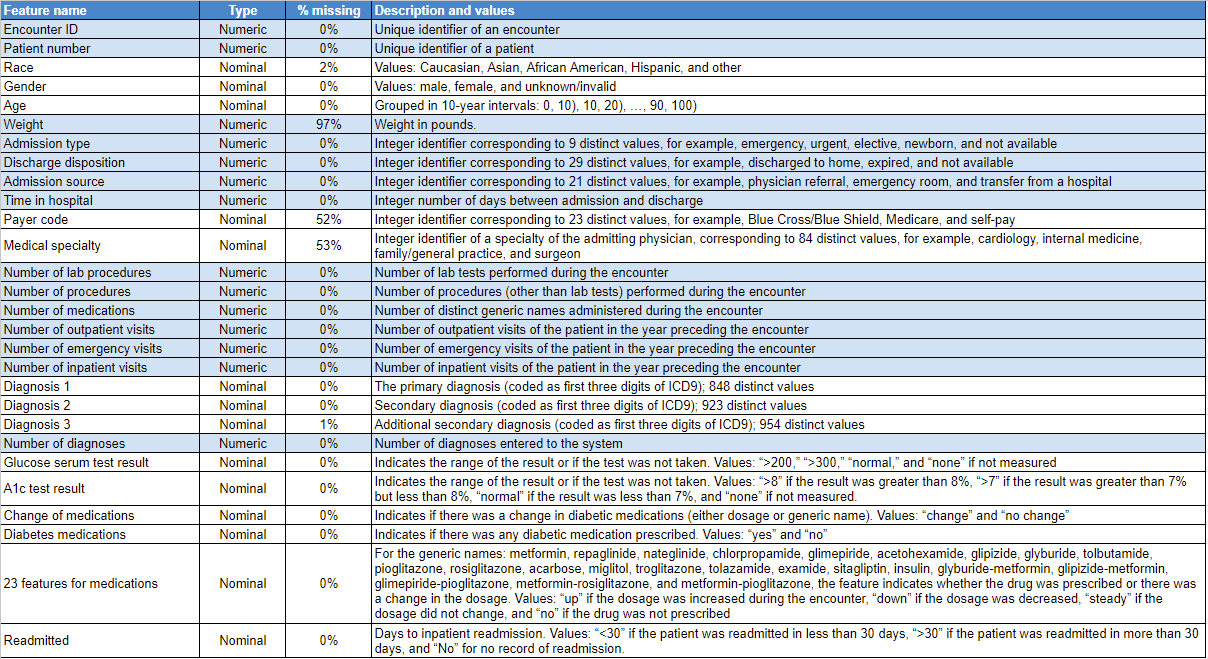

#EDA
## Loading Modules

In [ ]:
# import libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [ ]:
from google.colab import files
uploaded = files.upload()

Saving diabetic_data.csv to diabetic_data.csv


In [ ]:
# loading dataset
df = pd.read_csv("diabetic_data.csv")

In [ ]:
# loading first ten rows of data in transpose format as there are 50 features
df.head(10).T

0          1  \
encounter_id                               2278392     149190   
patient_nbr                                8222157   55629189   
race                                     Caucasian  Caucasian   
gender                                      Female     Female   
age                                         [0-10)    [10-20)   
weight                                           ?          ?   
admission_type_id                                6          1   
discharge_disposition_id                        25          1   
admission_source_id                              1          7   
time_in_hospital                                 1          3   
payer_code                                       ?          ?   
medical_specialty         Pediatrics-Endocrinology          ?   
num_lab_procedures                              41         59   
num_procedures                                   0          0   
num_medications                                  1         18   
number_outpatient                                0          0   
number_emergency                                 0          0   
number_inpatient                                 0          0   
diag_1                                      250.83        276   
diag_2                                           ?     250.01   
diag_3                                           ?        255   
number_diagnoses                                 1          9   
max_glu_serum                                 None       None   
A1Cresult                                     None       None   
metformin                                       No         No   
repaglinide                                     No         No   
nateglinide                                     No         No   
chlorpropamide                                  No         No   
glimepiride                                     No         No   
acetohexamide                                   No         No   
glipizide                                       No         No   
glyburide                                       No         No   
tolbutamide                                     No         No   
pioglitazone                                    No         No   
rosiglitazone                                   No         No   
acarbose                                        No         No   
miglitol                                        No         No   
troglitazone                                    No         No   
tolazamide                                      No         No   
examide                                         No         No   
citoglipton                                     No         No   
insulin                                         No         Up   
glyburide-metformin                             No         No   
glipizide-metformin                             No         No   
glimepiride-pioglitazone                        No         No   
metformin-rosiglitazone                         No         No   
metformin-pioglitazone                          No         No   
change                                          No         Ch   
diabetesMed                                     No        Yes   
readmitted                                      NO        >30   

                                        2          3          4          5  \
encounter_id                        64410     500364      16680      35754   
patient_nbr                      86047875   82442376   42519267   82637451   
race                      AfricanAmerican  Caucasian  Caucasian  Caucasian   
gender                             Female       Male       Male       Male   
age                               [20-30)    [30-40)    [40-50)    [50-60)   
weight                                  ?          ?          ?          ?   
admission_type_id                       1          1          1          2   
discharge_disposition_id                1          1          1          1   
admission_source_id            

In [ ]:
# loading the last 10 rows of the dataset
df.tail(10).T

101756     101757     101758     101759  \
encounter_id              443842070  443842136  443842340  443842778   
patient_nbr               140199494  181593374  120975314   86472243   
race                          Other  Caucasian  Caucasian  Caucasian   
gender                       Female     Female     Female       Male   
age                         [60-70)    [70-80)    [80-90)    [80-90)   
weight                            ?          ?          ?          ?   
admission_type_id                 1          1          1          1   
discharge_disposition_id          1          1          1          1   
admission_source_id               7          7          7          7   
time_in_hospital                  2          5          5          1   
payer_code                       MD          ?         MC         MC   
medical_specialty                 ?          ?          ?          ?   
num_lab_procedures               46         21         76          1   
num_procedures                    6          1          1          0   
num_medications                  17         16         22         15   
number_outpatient                 1          0          0          3   
number_emergency                  1          0          1          0   
number_inpatient                  1          1          0          0   
diag_1                          996        491        292        435   
diag_2                          585        518          8        784   
diag_3                          403        511        304        250   
number_diagnoses                  9          9          9          7   
max_glu_serum                  None       None       None       None   
A1Cresult                      None       None       None       None   
metformin                        No         No         No         No   
repaglinide                      No         No         No         No   
nateglinide                      No         No         No         No   
chlorpropamide                   No         No         No         No   
glimepiride                      No         No         No         No   
acetohexamide                    No         No         No         No   
glipizide                        No         No         No         No   
glyburide                        No         No         No         No   
tolbutamide                      No         No         No         No   
pioglitazone                     No         No         No         No   
rosiglitazone                    No         No         No         No   
acarbose                         No         No         No         No   
miglitol                         No         No         No         No   
troglitazone                     No         No         No         No   
tolazamide                       No         No         No         No   
examide                          No         No         No         No   
citoglipton                      No         No         No         No   
insulin                      Steady     Steady         Up         Up   
glyburide-metformin              No         No         No         No   
glipizide-metformin              No         No         No         No   
glimepiride-pioglitazone         No         No         No         No   
metformin-rosiglitazone          No         No         No         No   
metformin-pioglitazone           No         No         No         No   
change                           No         No         Ch         Ch   
diabetesMed                     Yes        Yes        Yes        Yes   
readmitted                      >30         NO         NO         NO   

                                   101760           101761           101762  \
encounter_id                    443847176        443847548        443847782   
patient_nbr                      50375628        100162476         74694222   
race                      AfricanAmerican  AfricanAmerican  AfricanAmerican   
gender                             Femal

In [ ]:
# checking shape of the dataset
df.shape

(101766, 50)

In [ ]:
# checking data types of each variable
df.dtypes

encounter_id                 int64
patient_nbr                  int64
race                        object
gender                      object
age                         object
weight                      object
admission_type_id            int64
discharge_disposition_id     int64
admission_source_id          int64
time_in_hospital             int64
payer_code                  object
medical_specialty           object
num_lab_procedures           int64
num_procedures               int64
num_medications              int64
number_outpatient            int64
number_emergency             int64
number_inpatient             int64
diag_1                      object
diag_2                      object
diag_3                      object
number_diagnoses             int64
max_glu_serum               object
A1Cresult                   object
metformin                   object
repaglinide                 object
nateglinide                 object
chlorpropamide              object
glimepiride         

In [ ]:
# checking if there's any missing values
# in the dataset missing values are represented as '?' sign
for col in df.columns:
    if df[col].dtype == object:
         print(col,df[col][df[col] == '?'].count())

race 2273
gender 0
age 0
weight 98569
payer_code 40256
medical_specialty 49949
diag_1 21
diag_2 358
diag_3 1423
max_glu_serum 0
A1Cresult 0
metformin 0
repaglinide 0
nateglinide 0
chlorpropamide 0
glimepiride 0
acetohexamide 0
glipizide 0
glyburide 0
tolbutamide 0
pioglitazone 0
rosiglitazone 0
acarbose 0
miglitol 0
troglitazone 0
tolazamide 0
examide 0
citoglipton 0
insulin 0
glyburide-metformin 0
glipizide-metformin 0
glimepiride-pioglitazone 0
metformin-rosiglitazone 0
metformin-pioglitazone 0
change 0
diabetesMed 0
readmitted 0


In [ ]:
# checking how many uniques values each feature has and what they are
for column in df.columns:
    unique_values = df[column].unique()
    print(f"{column} has {len(unique_values)} unique values: {unique_values}")

encounter_id has 101766 unique values: [  2278392    149190     64410 ... 443854148 443857166 443867222]
patient_nbr has 71518 unique values: [  8222157  55629189  86047875 ... 140199494 120975314 175429310]
race has 6 unique values: ['Caucasian' 'AfricanAmerican' '?' 'Other' 'Asian' 'Hispanic']
gender has 3 unique values: ['Female' 'Male' 'Unknown/Invalid']
age has 10 unique values: ['[0-10)' '[10-20)' '[20-30)' '[30-40)' '[40-50)' '[50-60)' '[60-70)'
 '[70-80)' '[80-90)' '[90-100)']
weight has 10 unique values: ['?' '[75-100)' '[50-75)' '[0-25)' '[100-125)' '[25-50)' '[125-150)'
 '[175-200)' '[150-175)' '>200']
admission_type_id has 8 unique values: [6 1 2 3 4 5 8 7]
discharge_disposition_id has 26 unique values: [25  1  3  6  2  5 11  7 10  4 14 18  8 13 12 16 17 22 23  9 20 15 24 28
 19 27]
admission_source_id has 17 unique values: [ 1  7  2  4  5  6 20  3 17  8  9 14 10 22 11 25 13]
time_in_hospital has 14 unique values: [ 1  3  2  4  5 13 12  9  7 10  6 11  8 14]
payer_code has 1

##Dealing with Missing Values

“weight” is missing in over 98% records. “payer_code” also has 40-50% missing values. The best thing is to drop them because the poor interpretability and little predictive generalizability to patients.

In [ ]:
# dropping columns with large number of missing values
df = df.drop(['weight','payer_code'], axis = 1)

“medical_specialty” also has 40- 50% missing values. Let's investigate

In [ ]:
# exploring "medical_specialty" through showing top 30 
print ('Number medical specialty:', df.medical_specialty.nunique())
df.groupby('medical_specialty').size().sort_values(ascending = False)[0:30]

Number medical specialty: 73


medical_specialty
?                                    49949
InternalMedicine                     14635
Emergency/Trauma                      7565
Family/GeneralPractice                7440
Cardiology                            5352
Surgery-General                       3099
Nephrology                            1613
Orthopedics                           1400
Orthopedics-Reconstructive            1233
Radiologist                           1140
Pulmonology                            871
Psychiatry                             854
Urology                                685
ObstetricsandGynecology                671
Surgery-Cardiovascular/Thoracic        652
Gastroenterology                       564
Surgery-Vascular                       533
Surgery-Neuro                          468
PhysicalMedicineandRehabilitation      391
Oncology                               348
Pediatrics                             254
Hematology/Oncology                    207
Neurology                           

We can see that most of them are unknown and that the count drops off pretty quickly. We don’t want to add 73 new variables since some of them only have a few samples. As an alternative, we can create a new variable that only has 11 options (the top 10 specialities and then an other category). Obviously, there are other options for bucketing, but this is one of the easiest methods for reducing the number of possible categories.



In [ ]:
top_10_med_specialty = df.groupby('medical_specialty').size().sort_values(ascending = False)[0:10]
top_10_med_specialty

medical_specialty
?                             49949
InternalMedicine              14635
Emergency/Trauma               7565
Family/GeneralPractice         7440
Cardiology                     5352
Surgery-General                3099
Nephrology                     1613
Orthopedics                    1400
Orthopedics-Reconstructive     1233
Radiologist                    1140
dtype: int64

In [ ]:
# create a copy of the medical_specialty column and replace values not in top 10 with "Other"
df['med_spec'] = df['medical_specialty'].apply(lambda x: x if x in top_10_med_specialty else "Other")

# group by the new column and display the counts
df.groupby('med_spec').size().sort_values(ascending = False)

med_spec
?                             49949
InternalMedicine              14635
Other                          8340
Emergency/Trauma               7565
Family/GeneralPractice         7440
Cardiology                     5352
Surgery-General                3099
Nephrology                     1613
Orthopedics                    1400
Orthopedics-Reconstructive     1233
Radiologist                    1140
dtype: int64

We will convert these categorical features in "medical_specialty" to numbers using one-hot encoding later. 

In one-hot encoding, we create a new column for each unique value in that column. Then the value of the column is 1 if the sample has that unique value or 0 otherwise. More details will be discussed in the "Pre modelling Data Processing".


"diag_1", "diag_2", "diag_3" and "race" contains very less missing values as compared to other attributes. So, we will drop those where missing values contains.

We will also drop those where "gender" contains 'Unknown/Invalid' value.


In [ ]:
# Remove missing values for diag_1, diag_2, diag_3, race and gender
drop_Idx = set(df[(df['diag_1'] == '?') & (df['diag_2'] == '?') & (df['diag_3'] == '?')].index)

drop_Idx = drop_Idx.union(set(df['diag_1'][df['diag_1'] == '?'].index))
drop_Idx = drop_Idx.union(set(df['diag_2'][df['diag_2'] == '?'].index))
drop_Idx = drop_Idx.union(set(df['diag_3'][df['diag_3'] == '?'].index))
drop_Idx = drop_Idx.union(set(df['race'][df['race'] == '?'].index))
drop_Idx = drop_Idx.union(set(df['gender'][df['gender'] == 'Unknown/Invalid'].index))

# Check if drop_Idx contains any indices that are out-of-bounds
drop_Idx = [idx for idx in drop_Idx if idx in df.index]

new_Idx = list(set(df.index) - set(drop_Idx))
df = df.iloc[new_Idx]


"examide" and "citoglipton" only have 1 unique value so we will drop them as these cannot provide any interpretive or discriminatory information for predicting readmission.

In [ ]:
# count the number of unique values in "examide" and "citoglipton"
unique_count = df['examide'].nunique()
print('Number of unique values in examide:', unique_count)

unique_count = df['citoglipton'].nunique()
print('Number of unique values in citoglipton:', unique_count)

Number of unique values in examide: 1
Number of unique values in citoglipton: 1


In [ ]:
# dropping citoglipton and examide columns
df = df.drop(['citoglipton', 'examide'], axis = 1)

In [ ]:
# checking for missing values in the data
for col in df.columns:
    if df[col].dtype == object:
         print(col,df[col][df[col] == '?'].count())
            
print('gender', df['gender'][df['gender'] == 'Unknown/Invalid'].count())   

race 0
gender 0
age 0
medical_specialty 48318
diag_1 0
diag_2 0
diag_3 0
max_glu_serum 0
A1Cresult 0
metformin 0
repaglinide 0
nateglinide 0
chlorpropamide 0
glimepiride 0
acetohexamide 0
glipizide 0
glyburide 0
tolbutamide 0
pioglitazone 0
rosiglitazone 0
acarbose 0
miglitol 0
troglitazone 0
tolazamide 0
insulin 0
glyburide-metformin 0
glipizide-metformin 0
glimepiride-pioglitazone 0
metformin-rosiglitazone 0
metformin-pioglitazone 0
change 0
diabetesMed 0
readmitted 0
med_spec 48318
gender 0


Again, only "medical_specialty" and "med_spec" have missing values. We will encode and process them later.

##Recoding and collapsing features


"Discharge disposition" tell us where the patient went after the hospitalization. 

Summary table as below:
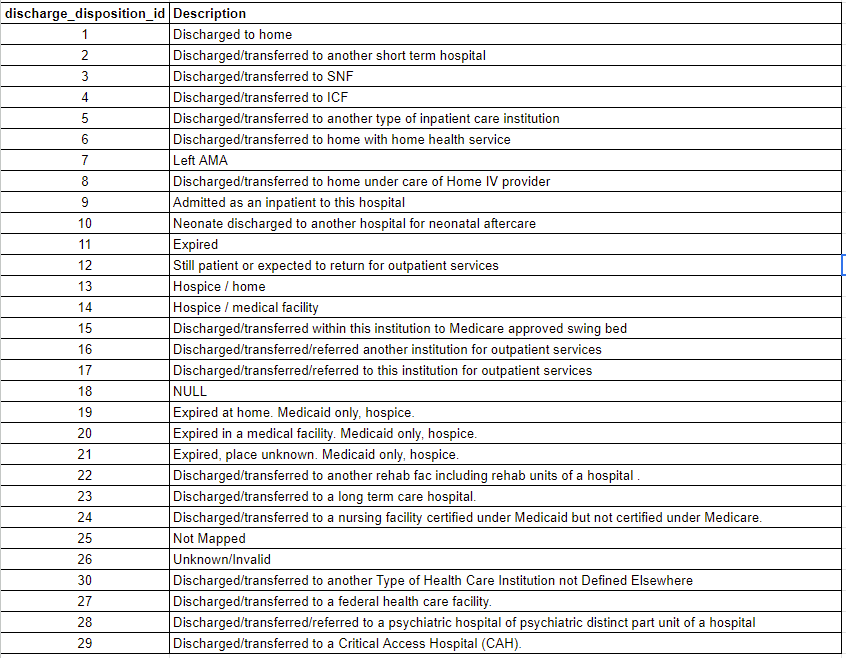

Since the objective is to predict readmission, those patients who died during this hospital admission were excluded. Encouters with "discharge_disposition_id" values of 11, 13, 14, 19, 20 and 21 are related to death or hospice which mean these patients cannot be readmitted.

In [ ]:
# removing rows where the value in the "discharge_disposition_id" column is one of the values in the list '[11, 13, 14, 19, 20, 21]'
df = df[~df['discharge_disposition_id'].isin([11, 13, 14, 19, 20, 21])]

# set the maximum number of rows and columns to be displayed
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)


# counting the frequency of each unique value in the "discharge_disposition_id" column in the updated dataframe ('df')
df['discharge_disposition_id'].value_counts()

1     57609
3     13564
6     12626
18     3624
2      2049
22     1970
5      1127
25      941
4       756
7       592
23      400
28      137
8       106
15       63
24       48
9        21
17       14
16       11
10        6
27        5
12        3
Name: discharge_disposition_id, dtype: int64

To simplify the model, we will re-encode discharge type into fewer categories based on their characteristics.
* 1 - Discharged to home 
* 2 - Discharged/transferred to another short term hospital
* 10 - Neonate discharged to another hospital for neonatal aftercare
* 18 - Null

In [ ]:
# re-encoding discharge type into fewer categories
df['discharge_disposition_id'] = df['discharge_disposition_id'].replace(6,1)
df['discharge_disposition_id'] = df['discharge_disposition_id'].replace(8,1)
df['discharge_disposition_id'] = df['discharge_disposition_id'].replace(9,1)

df['discharge_disposition_id'] = df['discharge_disposition_id'].replace(3,2)
df['discharge_disposition_id'] = df['discharge_disposition_id'].replace(4,2)
df['discharge_disposition_id'] = df['discharge_disposition_id'].replace(5,2)
df['discharge_disposition_id'] = df['discharge_disposition_id'].replace(22,2)
df['discharge_disposition_id'] = df['discharge_disposition_id'].replace(23,2)
df['discharge_disposition_id'] = df['discharge_disposition_id'].replace(24,2)

df['discharge_disposition_id'] = df['discharge_disposition_id'].replace(12,10)
df['discharge_disposition_id'] = df['discharge_disposition_id'].replace(15,10)
df['discharge_disposition_id'] = df['discharge_disposition_id'].replace(16,10)
df['discharge_disposition_id'] = df['discharge_disposition_id'].replace(17,10)

df['discharge_disposition_id'] = df['discharge_disposition_id'].replace(25,18)
df['discharge_disposition_id'] = df['discharge_disposition_id'].replace(26,18)


<ipython-input-19-1ac5d89b5bb5>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['discharge_disposition_id'] = df['discharge_disposition_id'].replace(6,1)
<ipython-input-19-1ac5d89b5bb5>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['discharge_disposition_id'] = df['discharge_disposition_id'].replace(8,1)
<ipython-input-19-1ac5d89b5bb5>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the cave

In [ ]:
# counting the frequency of each unique value in the "discharge_disposition_id" column in the updated dataframe ('df')
df['discharge_disposition_id'].value_counts()

1     70362
2     19914
18     4565
7       592
28      137
10       97
27        5
Name: discharge_disposition_id, dtype: int64

Number of medication changes: The dataset contains 23 features for 23 drugs (or combos) which indicate for each of these, whether a change in that medication was made or not during the current hospital stay of patient. Medication change upon admission has been shown by previous research to be associated with lower readmission rates (Lin, Singh, Kar, and Raza, 2017; Kampan, 2006). We decided to count how many changes were made in total for each patient, and declared that a new feature. The reasoning here was to both simplify the model and possibly discover a relationship with number of changes regardless of which drug was changed.

In [ ]:
keys = ['metformin', 'repaglinide', 'nateglinide', 'chlorpropamide', 'glimepiride', 'glipizide', 'glyburide', 'pioglitazone', 'rosiglitazone', 'acarbose', 'miglitol', 'insulin', 'glyburide-metformin', 'tolazamide', 'metformin-pioglitazone','metformin-rosiglitazone', 'glimepiride-pioglitazone', 'glipizide-metformin', 'troglitazone', 'tolbutamide', 'acetohexamide']

# for each medication in keys, a new column is created with the name <medication_name>temp. The values of this column are set to 0 if the corresponding medication dosage in the original dataframe (df) was either "No" or "Steady", and set to 1 otherwise.
for col in keys:
    colname = str(col) + 'temp'
    df[colname] = df[col].apply(lambda x: 0 if (x == 'No' or x == 'Steady') else 1)
df['numchange'] = 0

# after all the temporary columns are created, the numchange column is initialized to 0, and then updated by adding up the values of each <medication_name>temp column. Finally, the temporary columns are deleted from the dataframe, and the count of unique values in the resulting numchange column is returned using the value_counts() method.
for col in keys:
    colname = str(col) + 'temp'
    df['numchange'] = df['numchange'] + df[colname]
    del df[colname]
# count the number of patients who had a change in the dosage of 0, 1, 2, etc. medications, where a change is defined as a change in dosage from the previous visit.
df['numchange'].value_counts()  

<ipython-input-21-78bb0e6c4eb5>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[colname] = df[col].apply(lambda x: 0 if (x == 'No' or x == 'Steady') else 1)
<ipython-input-21-78bb0e6c4eb5>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[colname] = df[col].apply(lambda x: 0 if (x == 'No' or x == 'Steady') else 1)


0    69598
1    24701
2     1262
3      106
4        5
Name: numchange, dtype: int64

"admission_type_id" shows types of admission for Inpatient hospital stays.

Summary table as below:

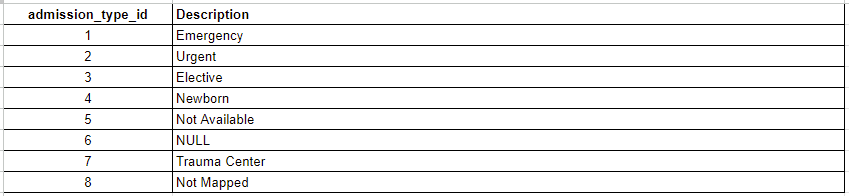

To simplify the model, we will re-encode amidssion type into fewer categories based on their characteristics.
* 1 - Emergency
* 5 - Not Available

In [ ]:
# re-encoding admission type into fewer categories
df['admission_type_id'] = df['admission_type_id'].replace(2,1)
df['admission_type_id'] = df['admission_type_id'].replace(7,1)

df['admission_type_id'] = df['admission_type_id'].replace(6,5)
df['admission_type_id'] = df['admission_type_id'].replace(8,5)

In [ ]:
# counting the frequency of each unique value in the "admission_type_id" column in the updated dataframe ('df')
df['admission_type_id'].value_counts()

1    67806
3    17998
5     9858
4       10
Name: admission_type_id, dtype: int64

"admission_source_id" tell us where the patient is admitted from.

Summary table as below:
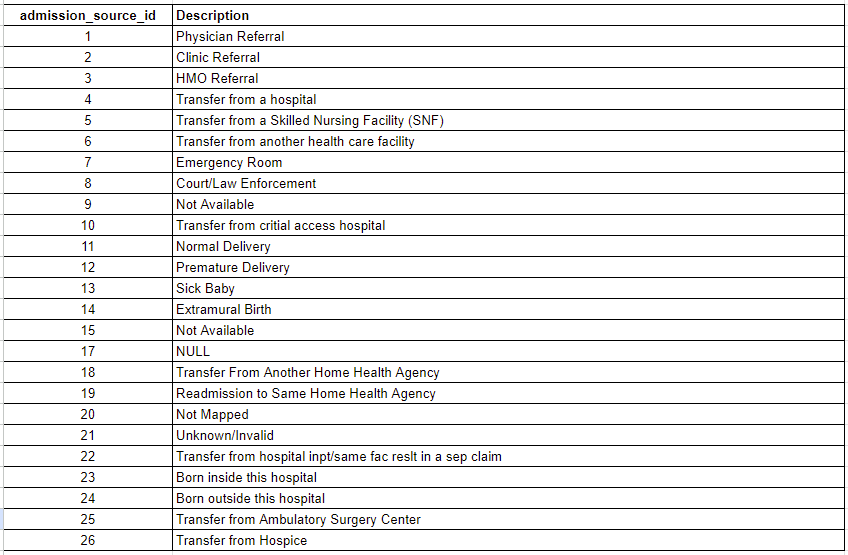

To simplify the model, we will re-encode amidssion source into fewer categories based on their characteristics.
* 1 - Physician Referal
* 4 - Transfer from a hospital
* 9 - Not Available
* 11 - Normal Delivery

In [ ]:
# re-encoding admission source into fewer categories
df['admission_source_id'] = df['admission_source_id'].replace(2,1)
df['admission_source_id'] = df['admission_source_id'].replace(3,1)

df['admission_source_id'] = df['admission_source_id'].replace(5,4)
df['admission_source_id'] = df['admission_source_id'].replace(6,4)
df['admission_source_id'] = df['admission_source_id'].replace(10,4)
df['admission_source_id'] = df['admission_source_id'].replace(22,4)
df['admission_source_id'] = df['admission_source_id'].replace(25,4)

df['admission_source_id'] = df['admission_source_id'].replace(15,9)
df['admission_source_id'] = df['admission_source_id'].replace(17,9)
df['admission_source_id'] = df['admission_source_id'].replace(20,9)
df['admission_source_id'] = df['admission_source_id'].replace(21,9)

df['admission_source_id'] = df['admission_source_id'].replace(13,11)
df['admission_source_id'] = df['admission_source_id'].replace(14,11)

In [ ]:
# counting the frequency of each unique value in the "admission_source_id" column in the updated dataframe ('df')
df['admission_source_id'].value_counts()

7     54333
1     29150
9      6600
4      5570
8        14
11        5
Name: admission_source_id, dtype: int64

Encoding some variables: The original dataset used string values for "gender", "race", "medication change", and each of the 23 drugs used. To better fit those variables into our model, we interpret the variables to numeric binary variables to reflect their nature. For example, we encoded the “ medication change ” feature from “No” (no change) and “Ch” (changed) into 0 and 1.

In [ ]:
# encoding categorical variables into numeric binary variables
df['change'] = df['change'].replace('Ch', 1)
df['change'] = df['change'].replace('No', 0)
df['gender'] = df['gender'].replace('Male', 1)
df['gender'] = df['gender'].replace('Female', 0)
df['diabetesMed'] = df['diabetesMed'].replace('Yes', 1)
df['diabetesMed'] = df['diabetesMed'].replace('No', 0)

# keys is the same as before
# encoding categorical variables into numeric binary variables for 23 types of drugs
for col in keys:
    df[col] = df[col].replace('No', 0)
    df[col] = df[col].replace('Steady', 1)
    df[col] = df[col].replace('Up', 1)
    df[col] = df[col].replace('Down', 1)

We also reduced both A1C test result and Glucose serum test result into categories of Normal, Abnormal and Not tested.

In [ ]:
# encoding categorical variables into numeric  variables for "A1C test result" and "glucose serum"
df['A1Cresult'] = df['A1Cresult'].replace('>7', 1)
df['A1Cresult'] = df['A1Cresult'].replace('>8', 1)
df['A1Cresult'] = df['A1Cresult'].replace('Norm', 0)
df['A1Cresult'] = df['A1Cresult'].replace('None', -99)
df['max_glu_serum'] = df['max_glu_serum'].replace('>200', 1)
df['max_glu_serum'] = df['max_glu_serum'].replace('>300', 1)
df['max_glu_serum'] = df['max_glu_serum'].replace('Norm', 0)
df['max_glu_serum'] = df['max_glu_serum'].replace('None', -99)

Encoding the outcome variable: The outcome we are looking at is whether the patient gets readmitted to the hospital within 30 days or not. The variable actually has < 30, > 30 and No Readmission categories. To reduce our problem to a binary classification, we combined the readmission after 30 days and no readmission into a single category:

In [ ]:
df['readmitted'].value_counts()

NO     50043
>30    34606
<30    11023
Name: readmitted, dtype: int64

In [ ]:
df['readmitted'] = df['readmitted'].replace('>30', 0)
df['readmitted'] = df['readmitted'].replace('<30', 1)
df['readmitted'] = df['readmitted'].replace('NO', 0)

"diag1", "diag2" and "diag3" are categorical and have a lot of values. We will group these ICD codes as below to reduce the dimension.

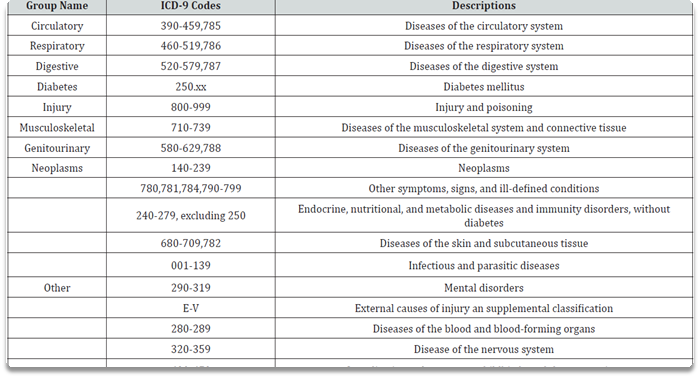

In [ ]:
diag_list = ['diag_1', 'diag_2', 'diag_3']
for col in diag_list:
    df[col].fillna('NaN', inplace=True)


In [ ]:
import re
# replacing any string starting with "V" followed by any number of digits with "0" and any string starting with "E" followed by any number of digits with "0". 
def transformFunc(value):
    value = re.sub("V[0-9]*", "0", value) # V 
    value = re.sub("E[0-9]*", "0", value) # E 
    value = re.sub('NaN', "-1", value) # Nan 
    return value

#classifying numeric values into a specify category as in the table above
def transformCategory(value):
    if value>=390 and value<=459 or value==785:
        category = 'Circulatory'
    elif value>=460 and value<=519 or value==786:
        category = 'Respiratory'
    elif value>=520 and value<=579 or value==787:
        category = 'Digestive'
    elif value==250:
        category = 'Diabetes'
    elif value>=800 and value<=999:
        category = 'Injury'          
    elif value>=710 and value<=739:
        category = 'Musculoskeletal'   
    elif value>=580 and value<=629 or value==788:
        category = 'Genitourinary'
    elif value>=140 and value<=239 :
        category = 'Neoplasms'
    elif value==-1:
        category = 'NAN'
    else :
        category = 'Other'

    return category

In [ ]:
# converts the values in each column to float data type 
for col in diag_list:
    df[col] = df[col].apply(transformFunc)
    df[col] = df[col].astype(float)

In [ ]:
for col in diag_list:
    df[col] = df[col].apply(transformCategory)

In [ ]:
# set the maximum number of rows and columns to be displayed
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

# counting the frequency of each unique value in the "diag_1", "diag_2" and "diag_3" columns in the updated dataframe ('df')
df['diag_1'].value_counts()

Circulatory        28887
Other              24848
Respiratory        13511
Digestive           9045
Injury              6590
Genitourinary       4870
Musculoskeletal     4717
Neoplasms           3013
Diabetes             191
Name: diag_1, dtype: int64

In [ ]:
df['diag_2'].value_counts()

Other              31530
Circulatory        30397
Respiratory        10140
Genitourinary       7977
Diabetes            5394
Digestive           3967
Injury              2286
Neoplasms           2274
Musculoskeletal     1707
Name: diag_2, dtype: int64

In [ ]:
df['diag_3'].value_counts()

Other              33380
Circulatory        28937
Diabetes           11122
Respiratory         6853
Genitourinary       6285
Digestive           3780
Musculoskeletal     1845
Injury              1844
Neoplasms           1626
Name: diag_3, dtype: int64

"age" is a categorical data. Since there is a natural order to these values of "age", it might make more sense to convert these to numerical data that is ordered. 

In [ ]:
# counting the frequency of each unique value in "age"
df.groupby('age').size()

age
[0-10)         64
[10-20)       466
[20-30)      1470
[30-40)      3537
[40-50)      9189
[50-60)     16504
[60-70)     21394
[70-80)     24580
[80-90)     15952
[90-100)     2516
dtype: int64

In [ ]:
# convert "age" into numerical data with middle points and map age intervals to their corresponding middle points
age_id = {'[0-10)':5,
          '[10-20)':15,
          '[20-30)':25,
          '[30-40)':35,
          '[40-50)':45,
          '[50-60)':55,
          '[60-70)':65,
          '[70-80)':75,
          '[80-90)':85,
          '[90-100)':95}

df['age_group'] = df.age.replace(age_id)

# convert the "age_group" column to integer data type
df['age_group'] = df['age_group'].astype(int)


In [ ]:
df.head().T

1                2            3          4  \
encounter_id                 149190            64410       500364      16680   
patient_nbr                55629189         86047875     82442376   42519267   
race                      Caucasian  AfricanAmerican    Caucasian  Caucasian   
gender                            0                0            1          1   
age                         [10-20)          [20-30)      [30-40)    [40-50)   
admission_type_id                 1                1            1          1   
discharge_disposition_id          1                1            1          1   
admission_source_id               7                7            7          7   
time_in_hospital                  3                2            2          1   
medical_specialty                 ?                ?            ?          ?   
num_lab_procedures               59               11           44         51   
num_procedures                    0                5            1          0   
num_medications                  18               13           16          8   
number_outpatient                 0                2            0          0   
number_emergency                  0                0            0          0   
number_inpatient                  0                1            0          0   
diag_1                        Other            Other        Other  Neoplasms   
diag_2                        Other         Diabetes        Other  Neoplasms   
diag_3                        Other            Other  Circulatory   Diabetes   
number_diagnoses                  9                6            7          5   
max_glu_serum                   -99              -99          -99        -99   
A1Cresult                       -99              -99          -99        -99   
metformin                         0                0            0          0   
repaglinide                       0                0            0          0   
nateglinide                       0                0            0          0   
chlorpropamide                    0                0            0          0   
glimepiride                       0                0            0          0   
acetohexamide                     0                0            0          0   
glipizide                         0                1            0          1   
glyburide                         0                0            0          0   
tolbutamide                       0                0            0          0   
pioglitazone                      0                0            0          0   
rosiglitazone                     0                0            0          0   
acarbose                          0                0            0          0   
miglitol                          0                0            0          0   
troglitazone                      0                0            0          0   
tolazamide                        0                0            0          0   
insulin                           1                0            1          1   
glyburide-metformin               0                0            0          0   
glipizide-metformin               0                0            0          0   
glimepiride-pioglitazone          0                0            0          0   
metformin-rosiglitazone           0                0            0          0   
metformin-pioglitazone            0                0            0          0   
change                            1                0            1          1   
diabetesMed                       1                1            1          1   
readmitted                        0                0            0          0   
med_spec                          ?                ?            ?          ?   
numchange                         1                0            1          0   
age_group                        15               25           35         45   

                                 

Collapsing of Multiple Encounters for same patient 

Some patients in the dataset had more than one encounter.We could not count them as independent encounters because that bias the results towards those patients who had multiple encounters. Thus we tried multiple techniques to collapse and consolidate multiple encounters for same patient such as:

* Considering more than 2 readmissions across multiple encounters as readmission for collapsed record.
* Considering average stay at hospital across multiple encounters.
* Considering the percentage of the medication changes across multiple encounters
* Considering the total number of the encounters to replace the encounter unique ID
* Considering the combination of diagnoses across multiple encounters as a list However, taking the features such as “diagnosis”, for instance, we did not find it not meaningful to combine multiple categorical values into an array for building data model. We then considered first encounter and last encounter separately as possible representations of multiple encounters. However, last encounters gave extremely imbalanced data for readmissions (96/4 Readmissions vs No Readmissions) and thus, we decided to use first encounters of patients with multiple encounters. This resulted in dataset being reduced to about 67,000 encounters:

In [ ]:
# removing duplicates from the dataframe based on "patient_nbr". The dataframe 'df2' will have only the first occurence of each unique "patient_nbr"
df2 = df.drop_duplicates(subset= ['patient_nbr'], keep = 'first')
df2.shape

(67128, 49)

In [ ]:
# counting the frequency of each unique value in "readmitted" in df2
df2["readmitted"].value_counts()

0    61010
1     6118
Name: readmitted, dtype: int64

In [ ]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 67128 entries, 1 to 101765
Data columns (total 49 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   encounter_id              67128 non-null  int64 
 1   patient_nbr               67128 non-null  int64 
 2   race                      67128 non-null  object
 3   gender                    67128 non-null  int64 
 4   age                       67128 non-null  object
 5   admission_type_id         67128 non-null  int64 
 6   discharge_disposition_id  67128 non-null  int64 
 7   admission_source_id       67128 non-null  int64 
 8   time_in_hospital          67128 non-null  int64 
 9   medical_specialty         67128 non-null  object
 10  num_lab_procedures        67128 non-null  int64 
 11  num_procedures            67128 non-null  int64 
 12  num_medications           67128 non-null  int64 
 13  number_outpatient         67128 non-null  int64 
 14  number_emergency     

We will drop some columns that have been encoded and modifed into new columns or columns that do not support the analysis. These columns are:
* encounter_id
* patient_nbr
* age
* medical_specialty

In [ ]:
# removing "encounter_id", "patient_nbr", "age" and "medical_specialty"
df2 = df2.drop(columns= ['encounter_id', 'patient_nbr', 'age', 'medical_specialty'], axis = 1 )
df2.shape

(67128, 45)

#Data Visualisation

Readmission distrbution

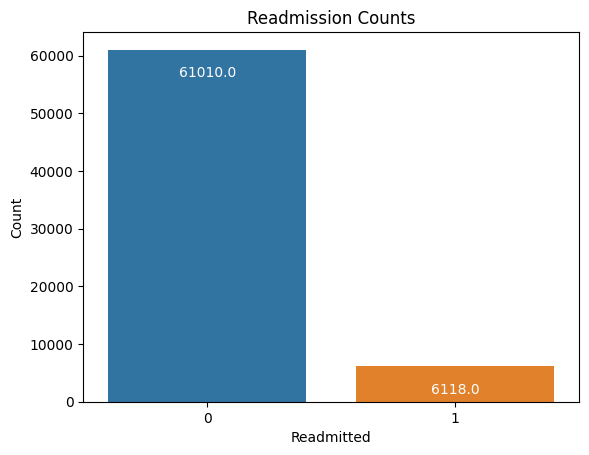

In [ ]:
# create countplot
ax = sns.countplot(x=df2["readmitted"])

# set title and axis labels
ax.set_title("Readmission Counts")
ax.set_xlabel("Readmitted")
ax.set_ylabel("Count")

# show counts above bars
for p in ax.patches:
    ax.annotate(f'\n{p.get_height()}', (p.get_x()+0.4, p.get_height()), ha='center', va='top', color='white')

# show plot
plt.show()

In [ ]:
# The readmission visits (i.e. the positive class) are a small portion of the total hospital visits (around 11%), representing a severe class imbalance problem for learning. 

Time in hospital and Readmission

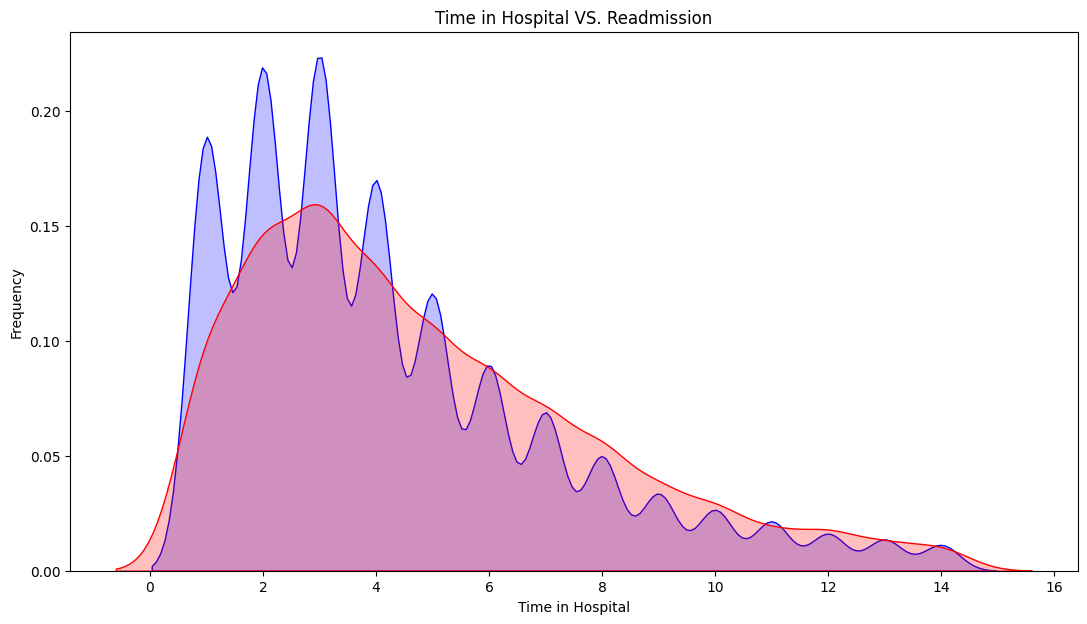

In [ ]:
fig = plt.figure(figsize=(13, 7))
ax = sns.kdeplot(df2.loc[df2['readmitted'] == 0, 'time_in_hospital'], color='b', fill=True, label='Not Readmitted')
ax = sns.kdeplot(df2.loc[df2['readmitted'] == 1, 'time_in_hospital'], color='r', fill=True, label='Readmitted')
ax.set(xlabel='Time in Hospital', ylabel='Frequency')
plt.title('Time in Hospital VS. Readmission')
plt.show()

In [ ]:
# The distributions for both groups are skewed to the right, with a higher density of patients having shorter hospital stays (lower values of 'time_in_hospital').

Discharge disposition and Readmission

* 1 - Discharged to home 
* 2 - Discharged/transferred to another short term hospital
* 7 -- Left AMA
* 10 - Neonate discharged to another hospital for neonatal aftercare
* 18 - Null
* 27 - Discharged/transferred to a federal health care facility
* 28 - Discharged/transferred/referred to a psychiatric hospital of  psychiatric distinct part unit of a hospital

Text(0.5, 1.0, 'Discharge Disposition VS. Readmission')

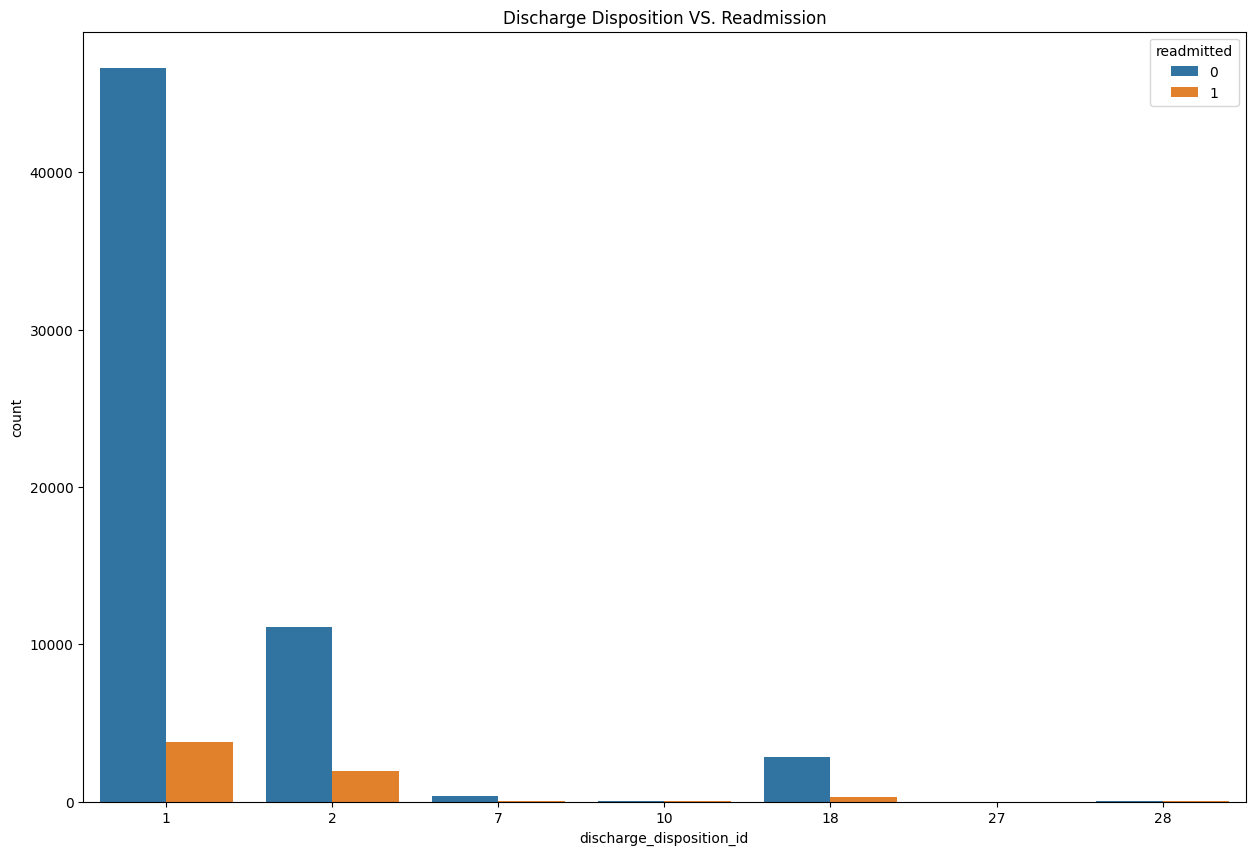

In [ ]:
fig = plt.figure(figsize=(15,10))
sns.countplot(x= df2['discharge_disposition_id'], hue = df2['readmitted']).set_title('Discharge Disposition VS. Readmission')
 

In [ ]:
# Patients who were discharged to home are more likely to be readmitted than other discharge disposition

Number of medication changes and Readmission

Text(0.5, 1.0, 'Number of medication changes VS. Readmission')

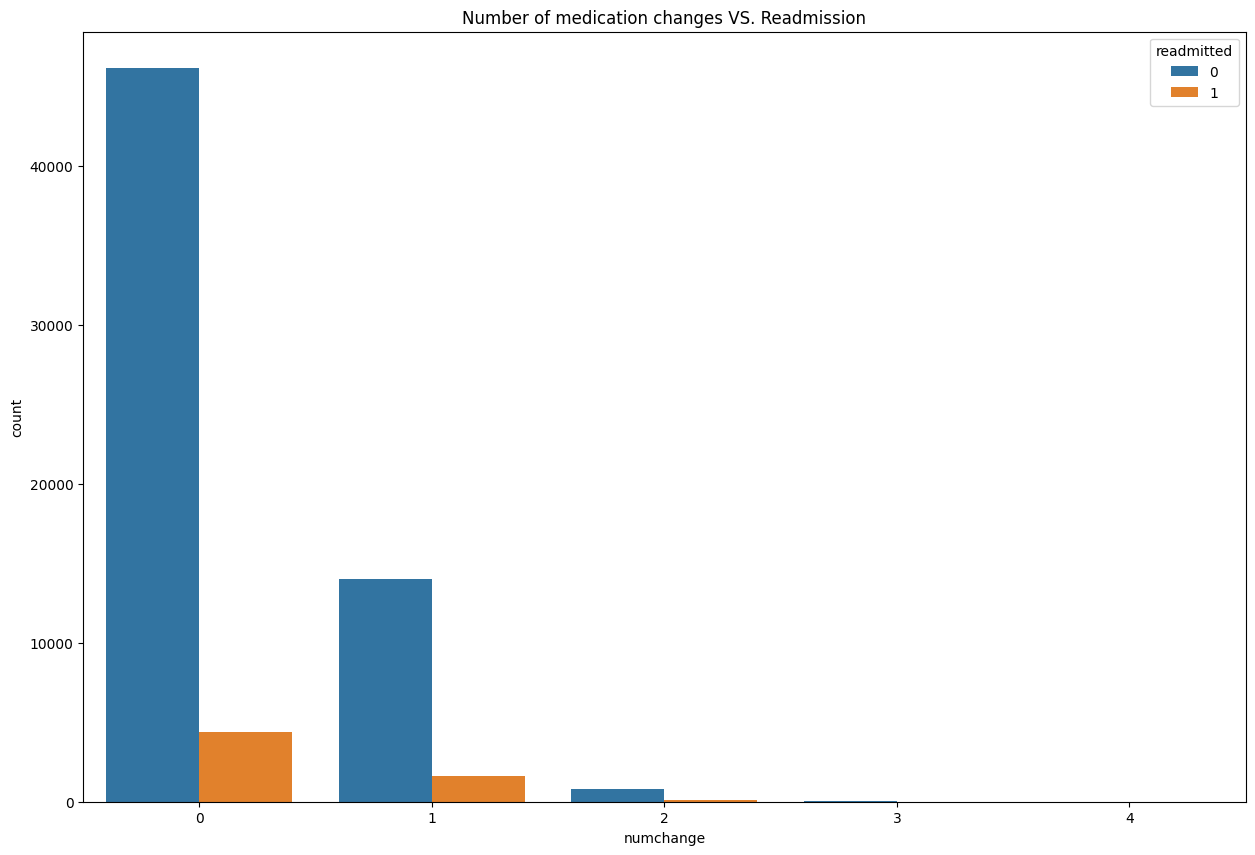

In [ ]:
fig = plt.figure(figsize=(15,10))
sns.countplot(x= df2['numchange'], hue = df2['readmitted']).set_title('Number of medication changes VS. Readmission')

In [ ]:
# There is a trend of lower frequency of readmitted patients as the number of medication changes increases. This suggests that patients with higher number of medication changes may have a lower likelihood of being readmitted.

Changes of diabetic medications and Readmission

Text(0.5, 1.0, 'Changes of diabetic medication VS. Readmission')

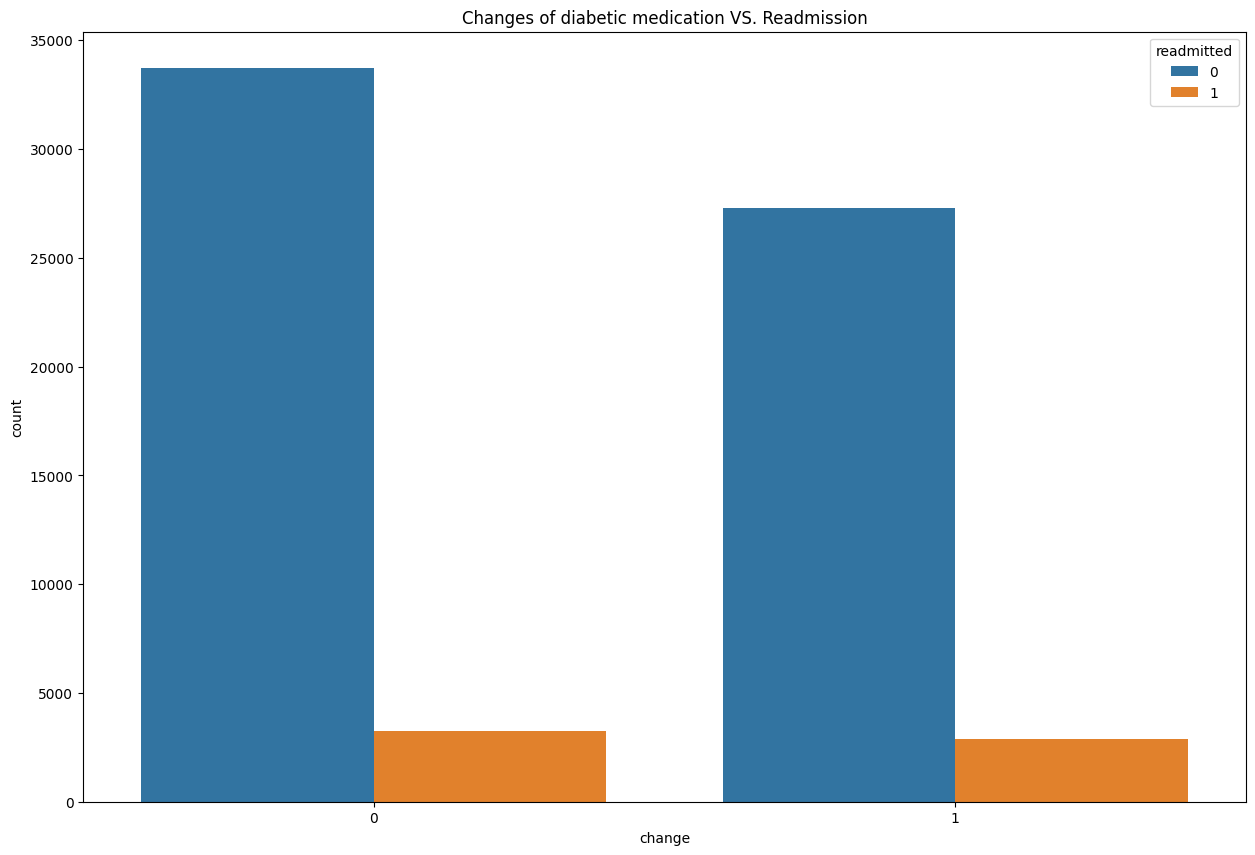

In [ ]:
fig = plt.figure(figsize=(15,10))
sns.countplot(x= df2['change'], hue = df2['readmitted']).set_title('Changes of diabetic medication VS. Readmission')

In [ ]:
# There's not much differences between readmitted and not readmitted patients if there's a change in diabetic medication

Age and Readmission

Text(0.5, 1.0, 'Age of Patient VS. Readmission')

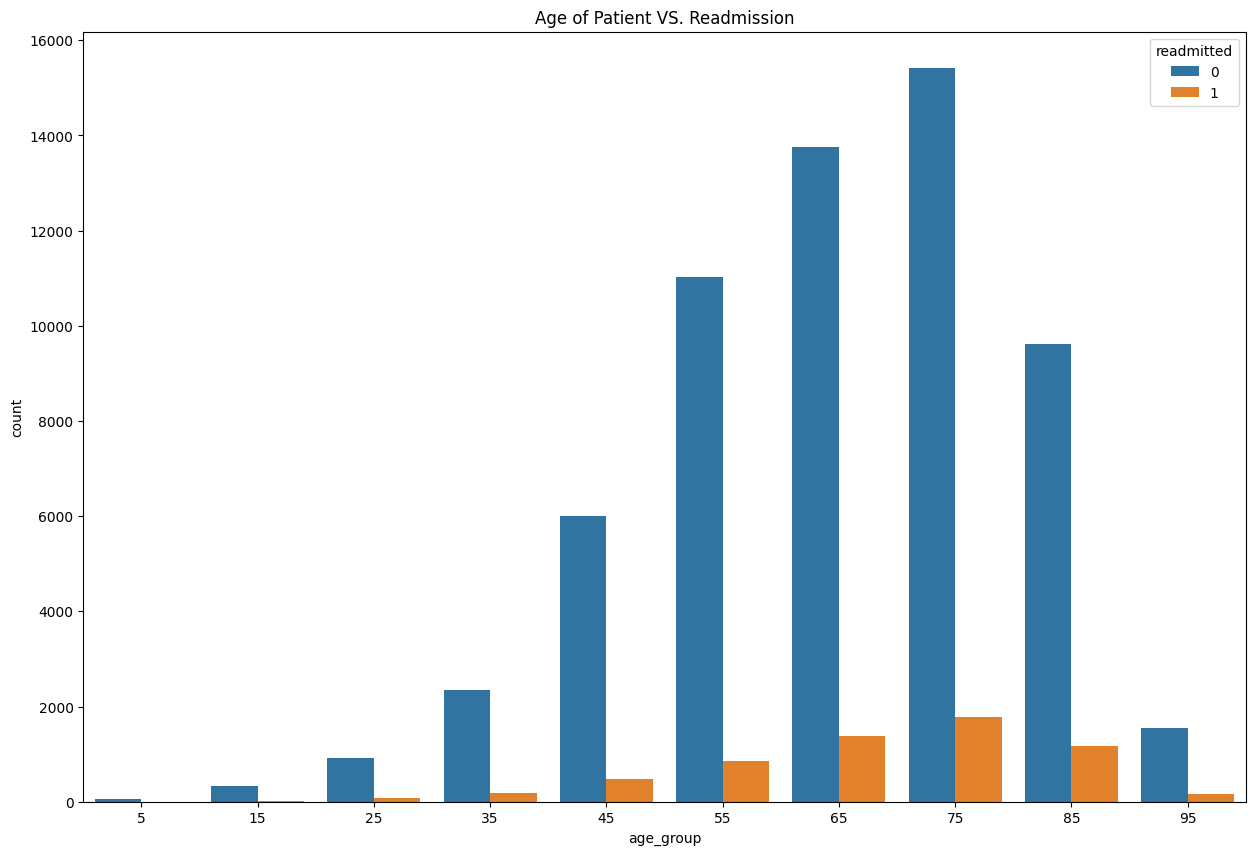

In [ ]:
fig = plt.figure(figsize=(15,10))
sns.countplot(x= df2['age_group'], hue = df2['readmitted']).set_title('Age of Patient VS. Readmission')

In [ ]:
#The majority of both non-readmitted and readmitted patients were between 50 and 90 years old

Primary diagnosis and age group

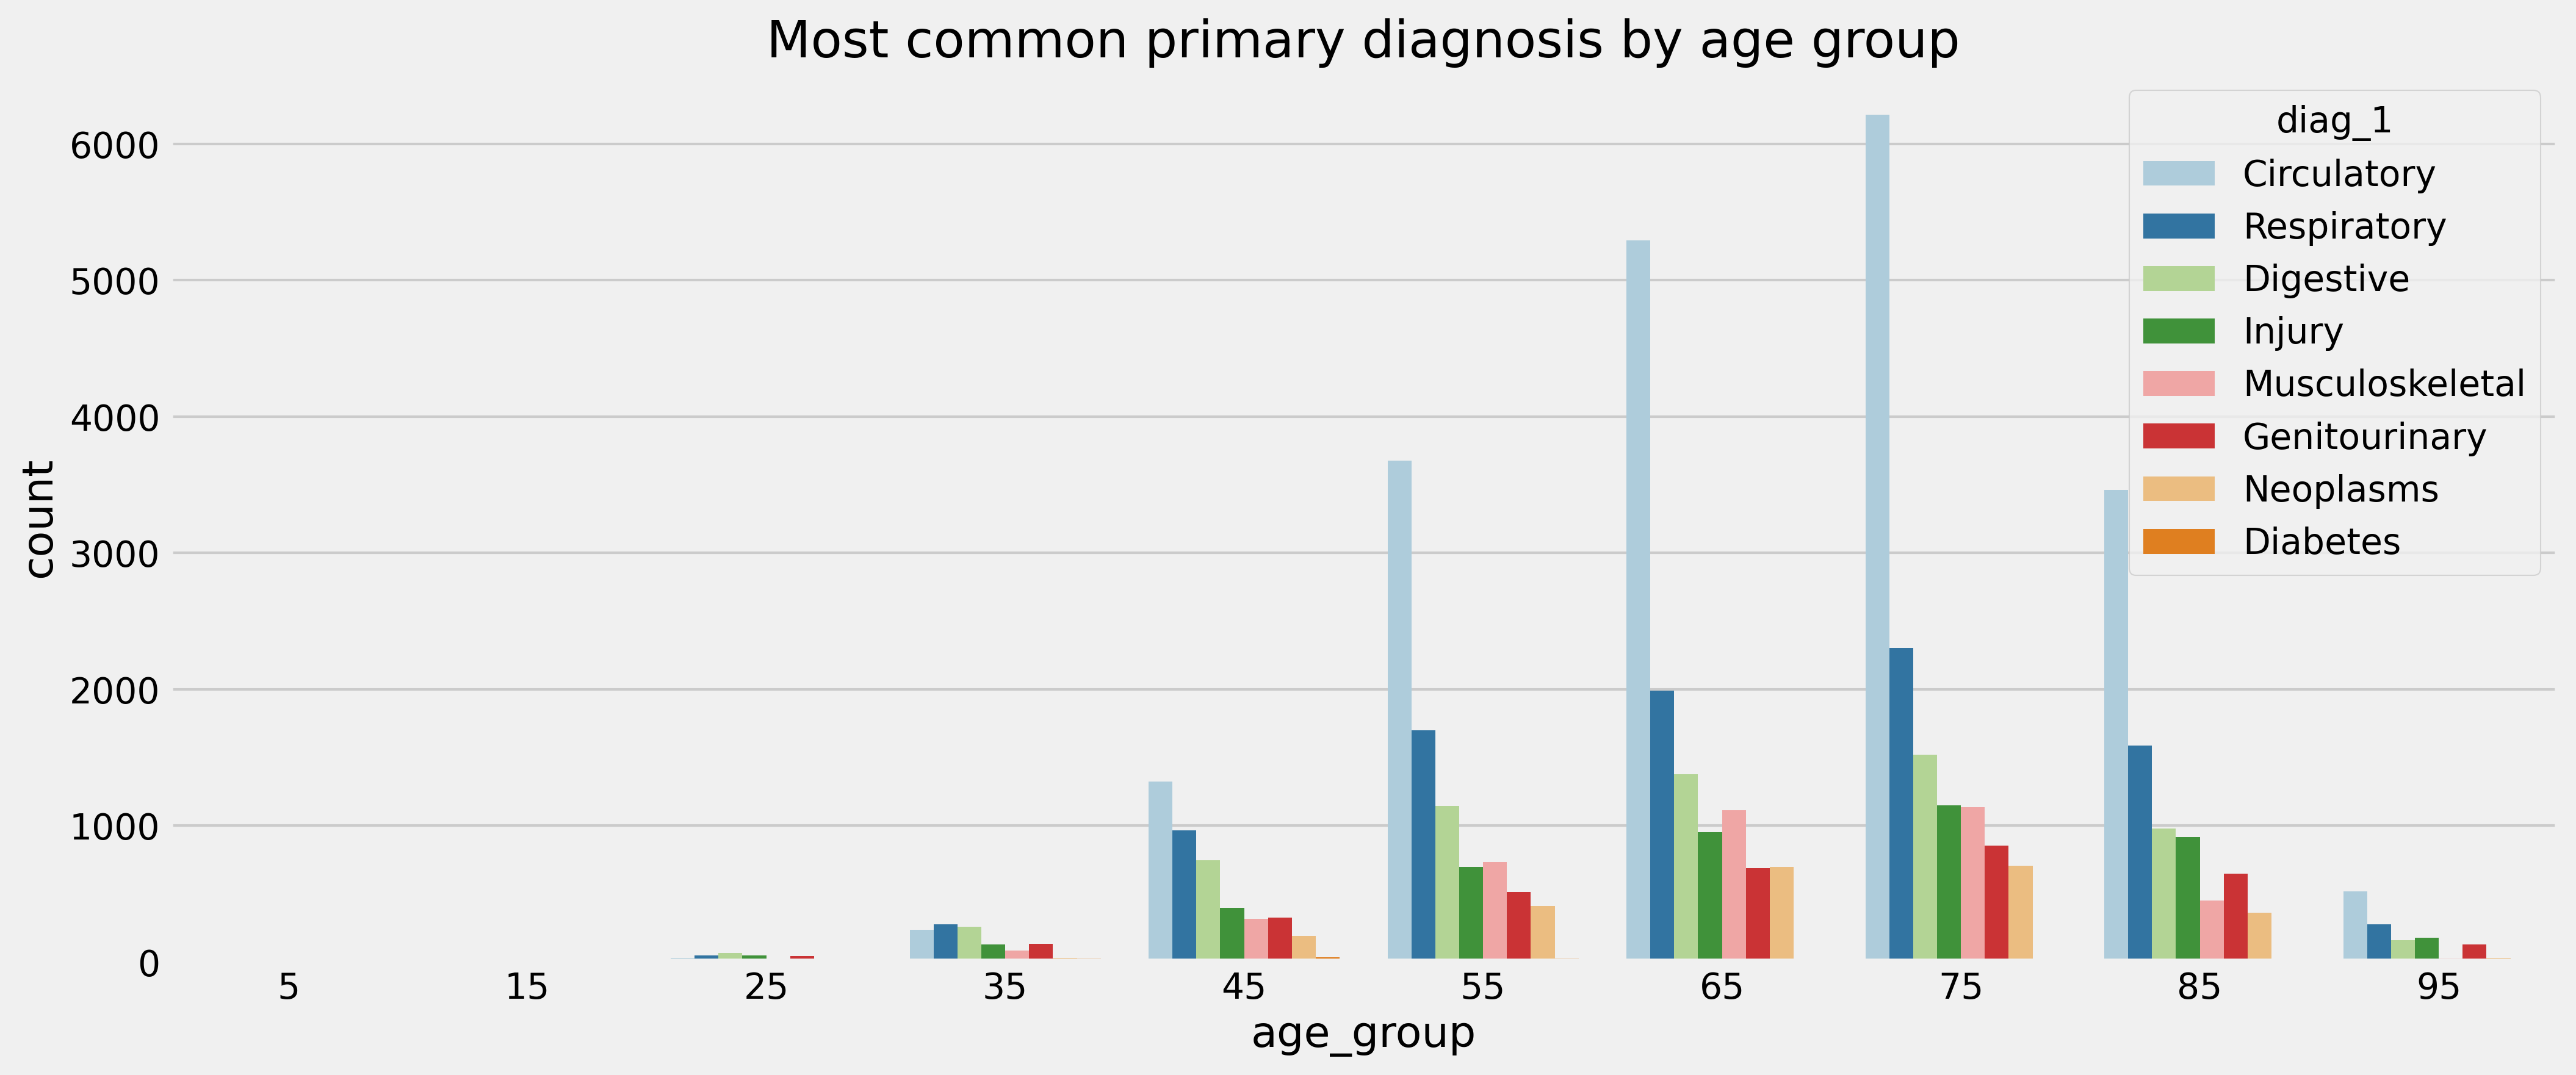

In [ ]:
diag = df2[df2["diag_1"]!="Other"].copy()
with plt.style.context('fivethirtyeight'):
    sns.set_palette("Paired")
    
    plt.figure(figsize=(15, 6), dpi=300)
    sns.countplot(x=diag['age_group'], 
                  hue= diag["diag_1"],
                  hue_order=diag["diag_1"].value_counts().index)
    plt.title("Most common primary diagnosis by age group")
    plt.show()

In [ ]:
# Circulatory, Respiratory and Digestive are the most common diagnosis for all age groups

Secondary diagnosis and age group

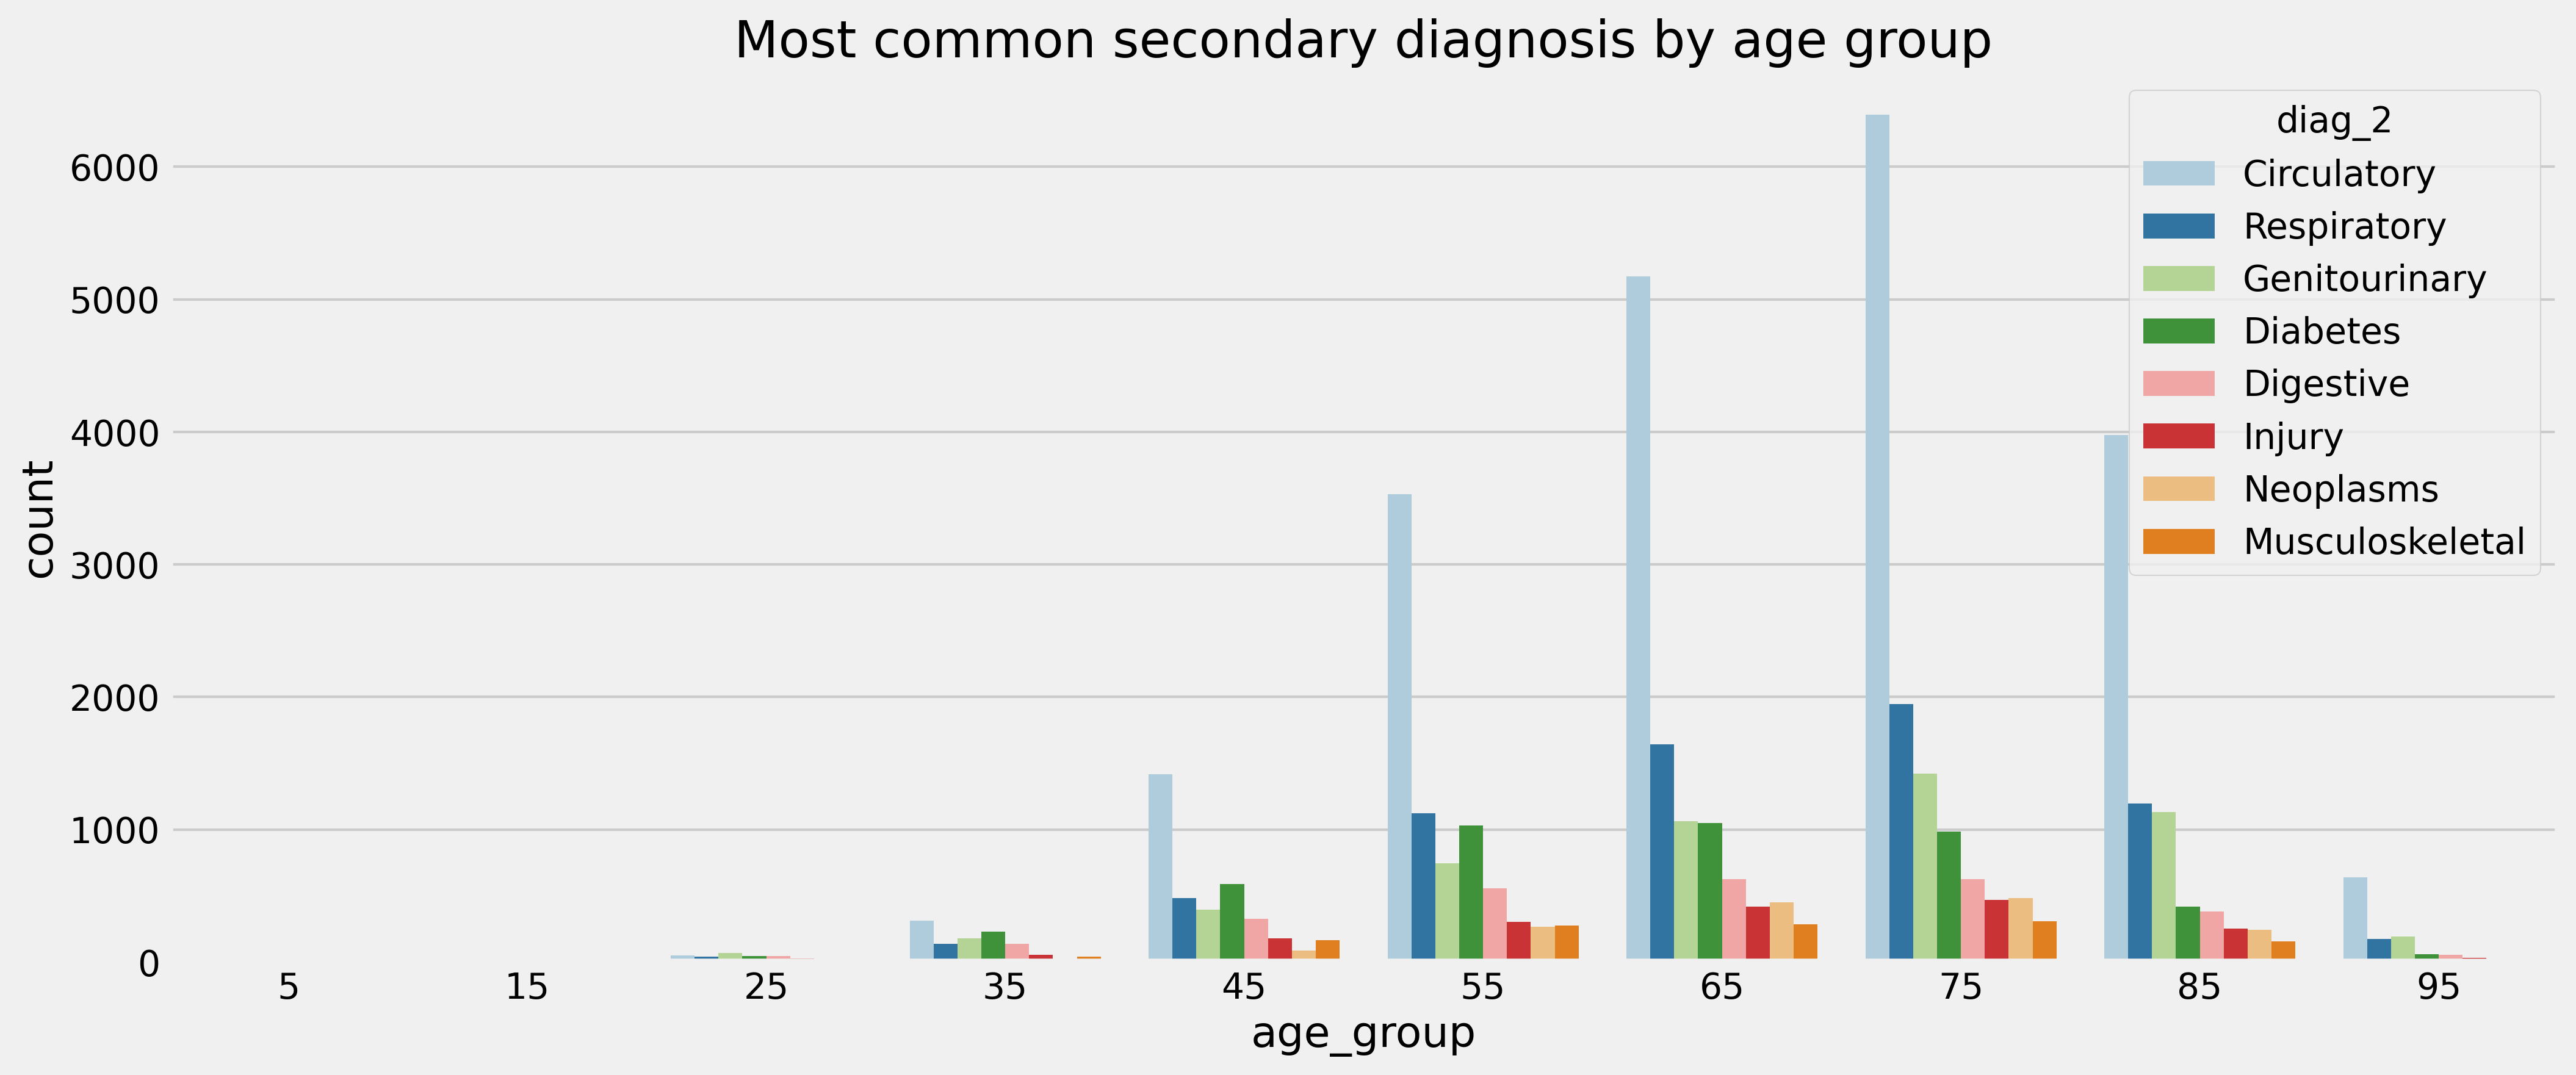

In [ ]:
diag = df2[df2["diag_2"]!="Other"].copy()
with plt.style.context('fivethirtyeight'):
    sns.set_palette("Paired")
    
    plt.figure(figsize=(15, 6), dpi=300)
    sns.countplot(x=diag['age_group'], 
                  hue= diag["diag_2"],
                  hue_order=diag["diag_2"].value_counts().index)
    plt.title("Most common secondary diagnosis by age group")
    plt.show()

In [ ]:
# Circulatory, Respiratory, Genitourinary and Diabetes are the most common secondary diagnosis for all age groups

Additional secondary diagnosis and age group

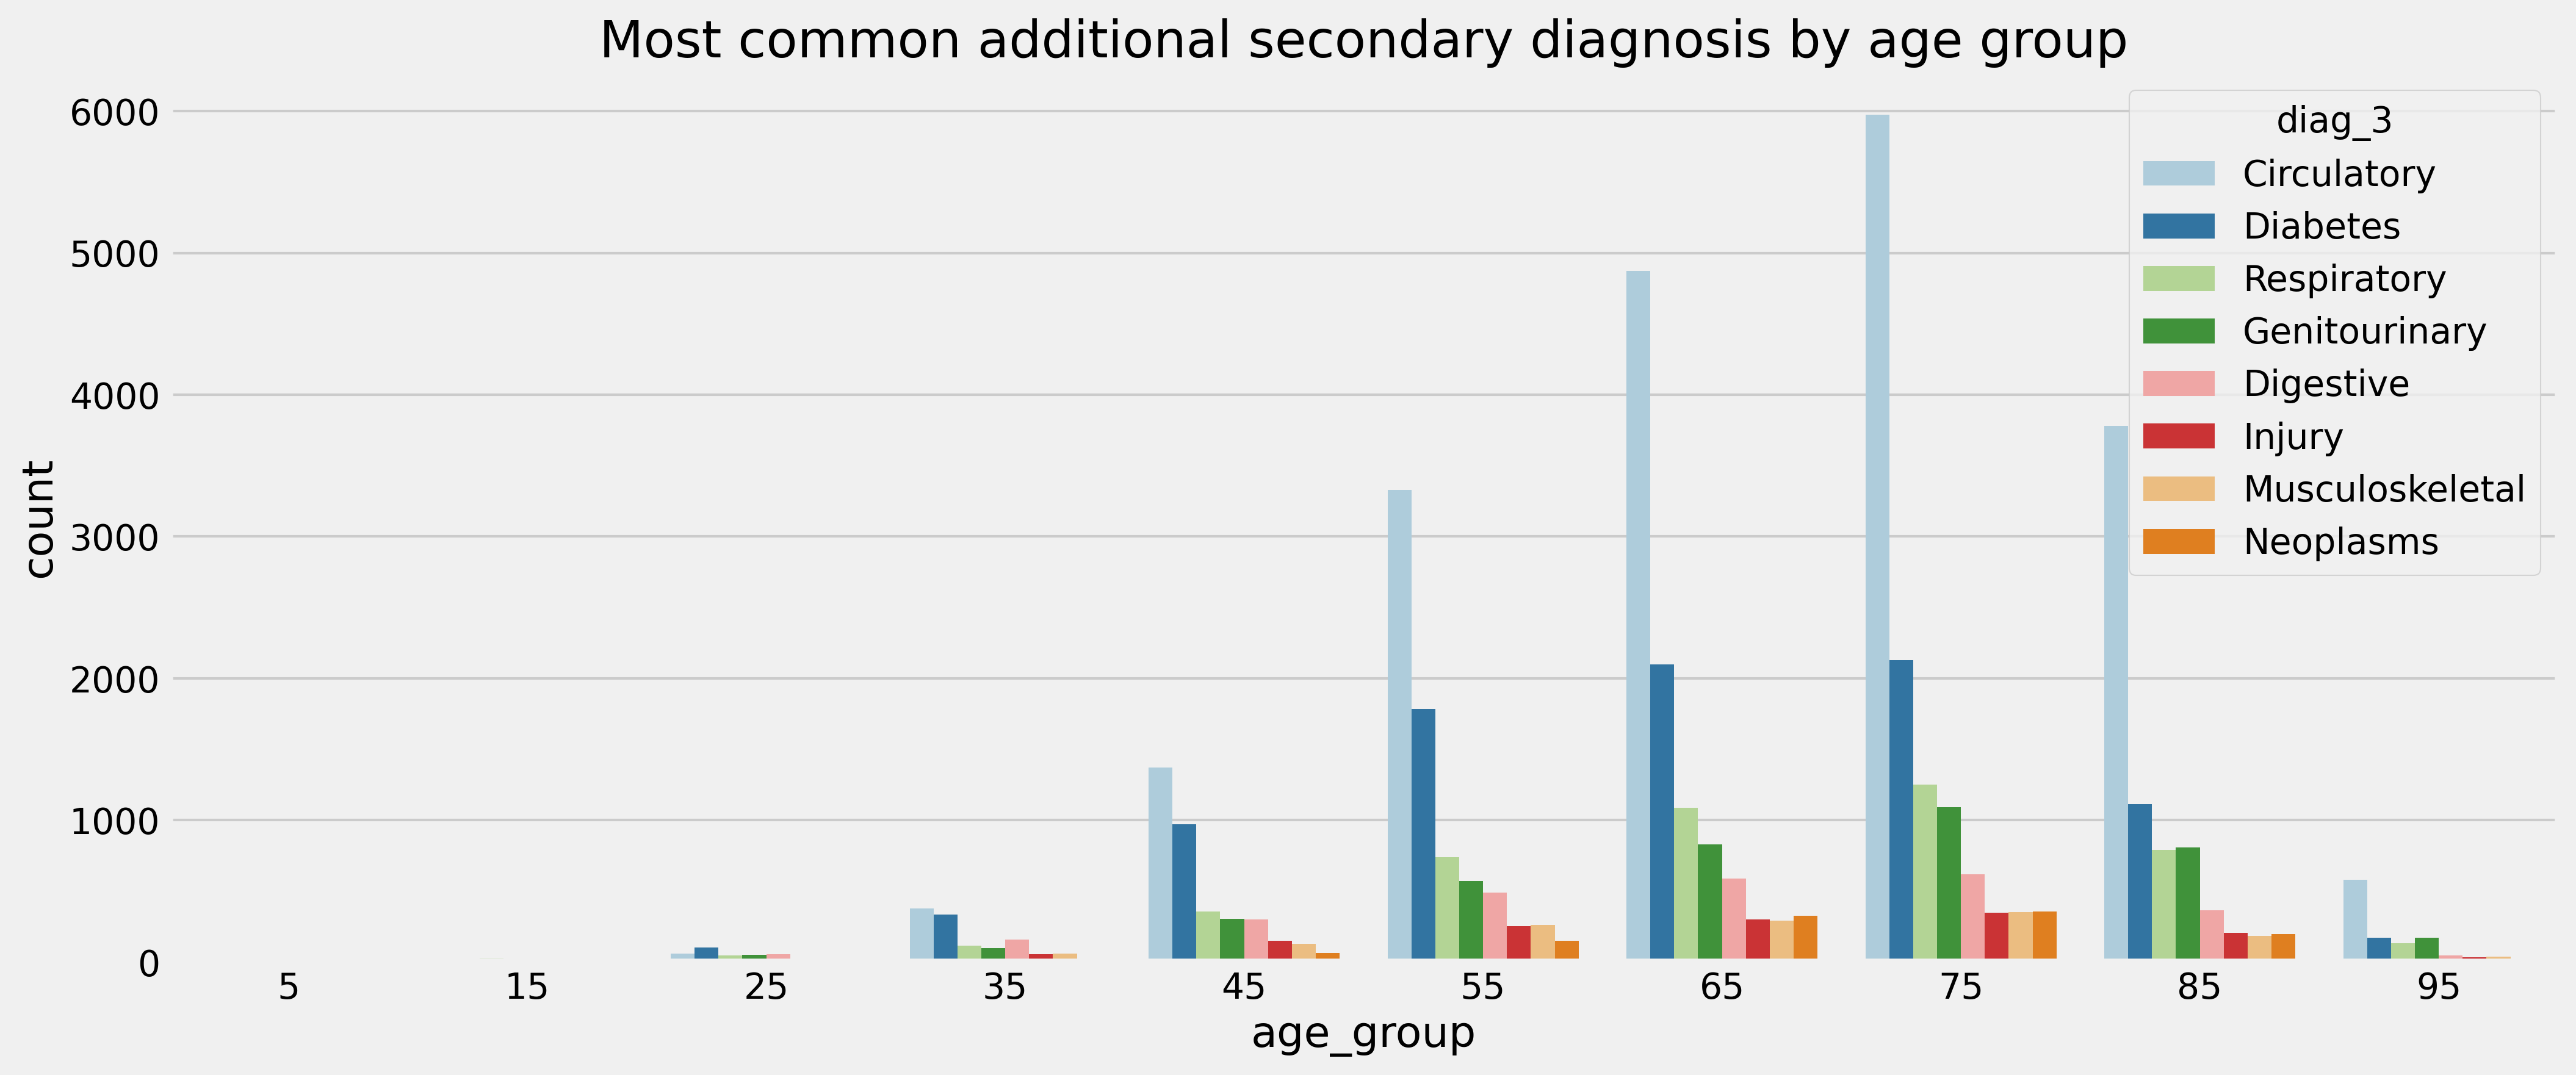

In [ ]:
diag = df2[df2["diag_3"]!="Other"].copy()
with plt.style.context('fivethirtyeight'):
    sns.set_palette("Paired")
    
    plt.figure(figsize=(15, 6), dpi=300)
    sns.countplot(x=diag['age_group'], 
                  hue= diag["diag_3"],
                  hue_order=diag["diag_3"].value_counts().index)
    plt.title("Most common additional secondary diagnosis by age group")
    plt.show()

In [ ]:
# Circulatory, Diabetes, Respiratory and Genitourinary are the most common additional secondary diagnosis for all age groups

Ethnicity of patient and Readmission


<Axes: xlabel='race', ylabel='count'>

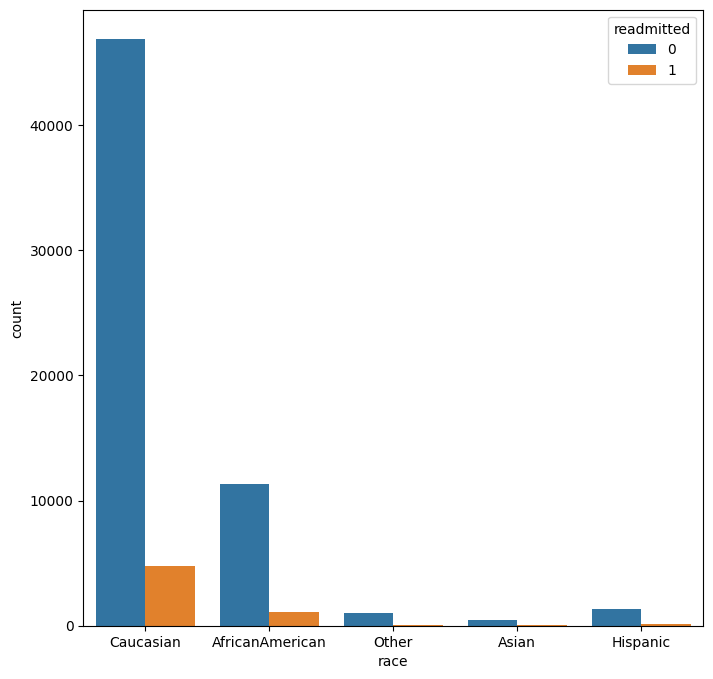

In [ ]:
fig = plt.figure(figsize=(8,8))
sns.countplot(x = df2['race'], hue = df2['readmitted'])

In [ ]:
# It is possible that the higher likelihood of readmission among Caucasians compared to other races may be influenced by the larger proportion of Caucasian samples in the dataset.

Number of medication used and Readmission¶


Text(0.5, 1.0, 'Number of medication used VS. Readmission')

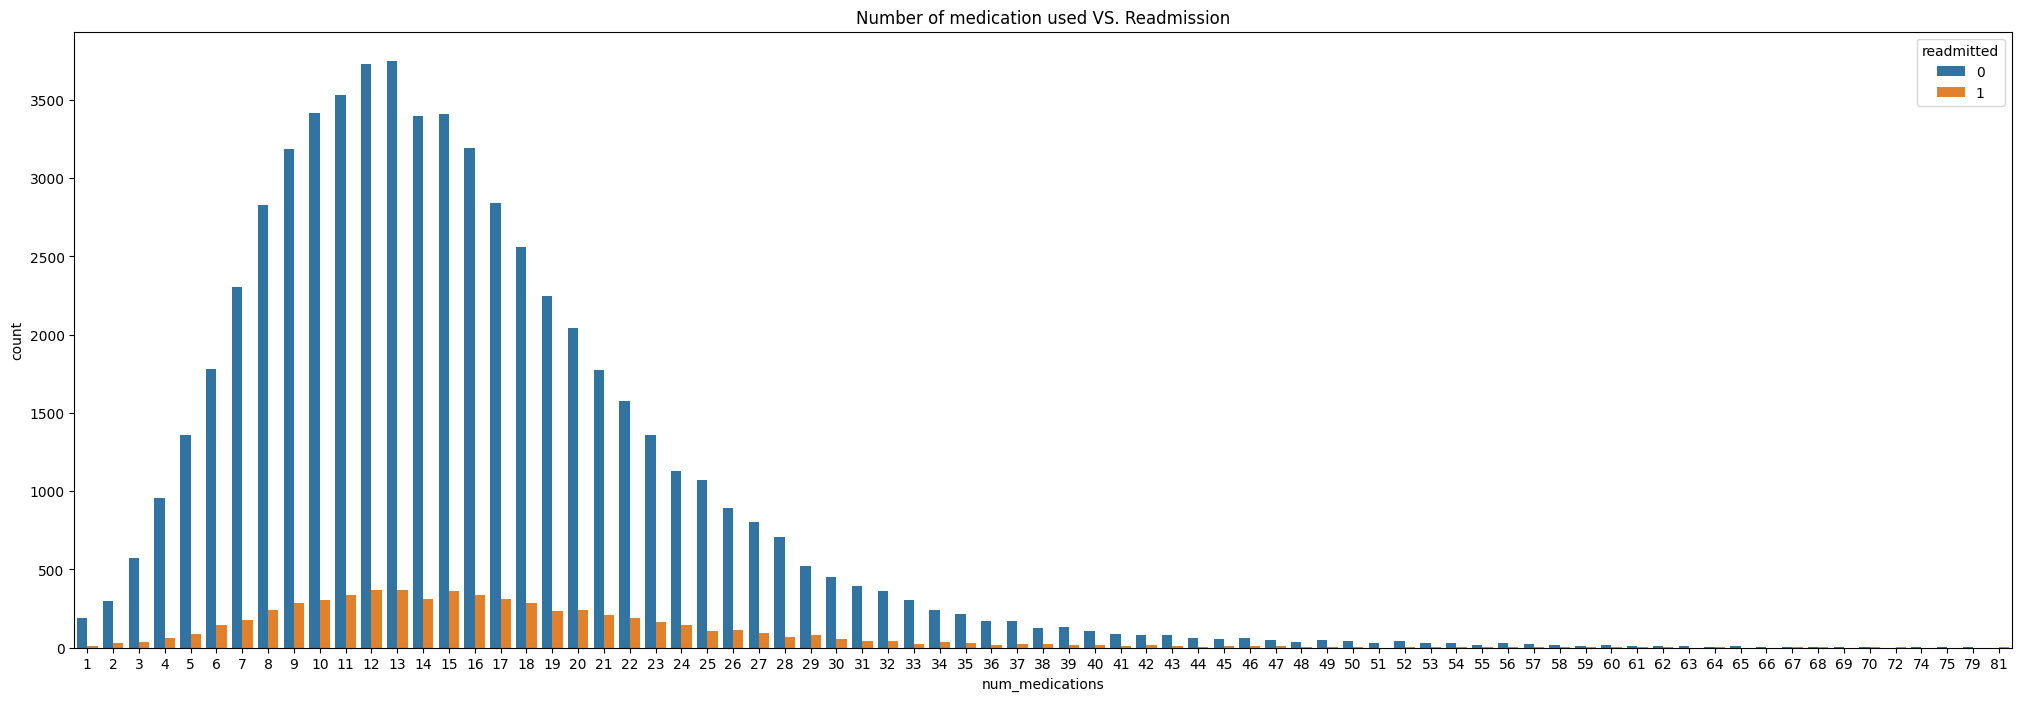

In [ ]:
fig = plt.figure(figsize=(25,8))
sns.countplot(x = df2['num_medications'],  hue = df2['readmitted']).set_title("Number of medication used VS. Readmission")

In [ ]:
# The distributions for both groups are skewed to the right, with a higher density of patients having 8-21 medications used

Gender and Readmission¶


([<matplotlib.axis.XTick at 0x7fb98a5e9b80>,
 [Text(0, 0, 'Female'), Text(1, 0, 'Male')])

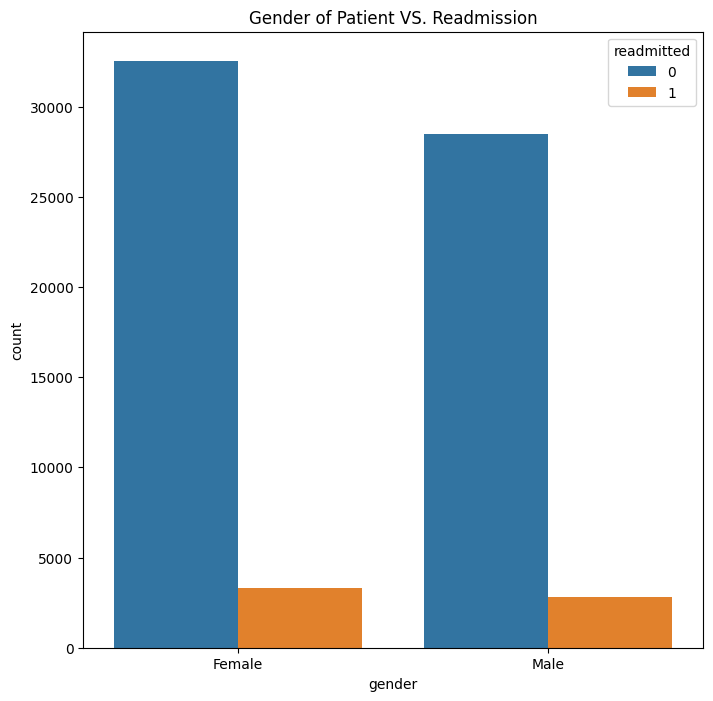

In [ ]:
fig = plt.figure(figsize=(8,8))
sns.countplot(x=df2['gender'], hue = df2['readmitted']).set_title("Gender of Patient VS. Readmission")
plt.xticks([0, 1], ['Female', 'Male'])


In [ ]:
# Female patients are more likely to be readmitted than male patients

Diabetes Medication prescribed and Readmission¶


([<matplotlib.axis.XTick at 0x7fb98a6529a0>,
 [Text(0, 0, 'No'), Text(1, 0, 'Yes')])

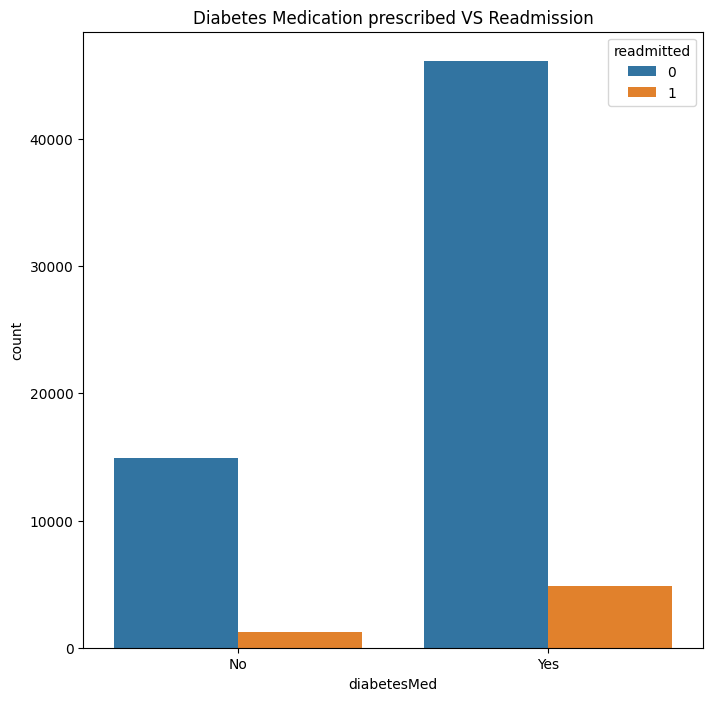

In [ ]:
fig = plt.figure(figsize=(8,8))
sns.countplot(x=df2['diabetesMed'], hue = df2['readmitted']).set_title('Diabetes Medication prescribed VS Readmission')
plt.xticks([0, 1], ['No', 'Yes'])

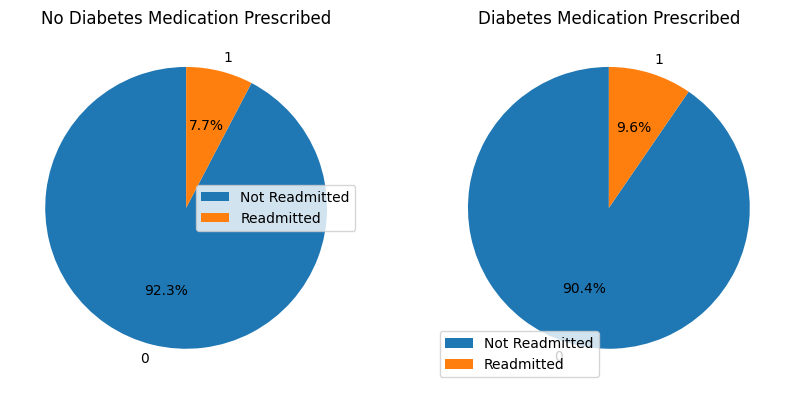

In [ ]:
# Filter the data for no diabetes medication prescribed
no_diabetesmed_df = df2[df2['diabetesMed'] == 0]

# Filter the data for diabetes medication prescribed
diabetesmed_df = df2[df2['diabetesMed'] == 1]

# Create a 1x2 grid of subplots
fig, axes = plt.subplots(1, 2, figsize=(10, 10))

# Plot the first pie chart for no diabetes medication prescribed
no_diabetesmed_data = no_diabetesmed_df['readmitted'].value_counts()
axes[0].pie(no_diabetesmed_data, labels=no_diabetesmed_data.index, autopct='%1.1f%%', startangle=90)
axes[0].legend(['Not Readmitted', 'Readmitted'])
axes[0].set_title('No Diabetes Medication Prescribed')

# Plot the second pie chart for diabetes medication prescribed
diabetesmed_data = diabetesmed_df['readmitted'].value_counts()
axes[1].pie(diabetesmed_data, labels=diabetesmed_data.index, autopct='%1.1f%%', startangle=90)
axes[1].legend(['Not Readmitted', 'Readmitted'])
axes[1].set_title('Diabetes Medication Prescribed')

plt.show()


In [ ]:
# There is a possibility that the prescription of diabetic medication may affect the likelihood of being readmitted. 

Insulin and Readmission

Text(0.5, 1.0, 'Insulin VS. Readmission')

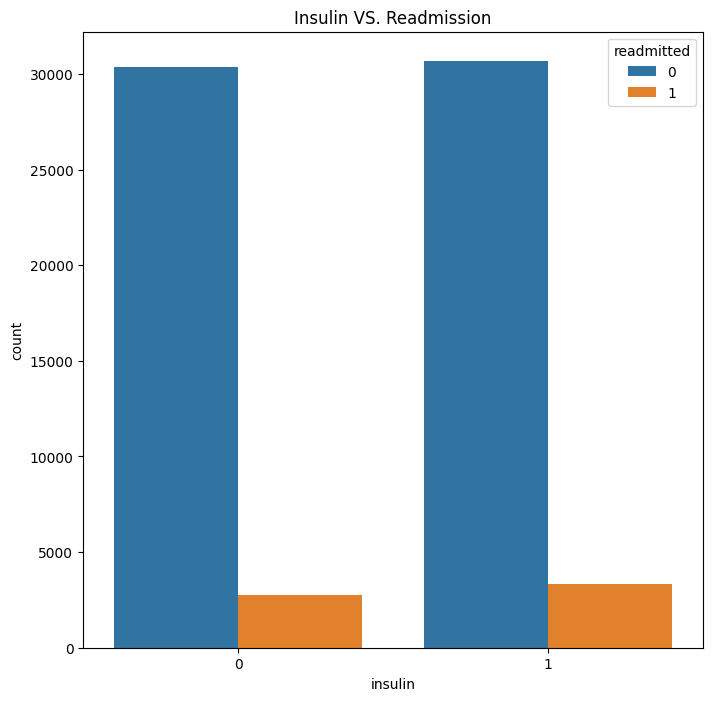

In [ ]:
fig = plt.figure(figsize=(8,8))
sns.countplot(x = df2['insulin'], hue = df2['readmitted']).set_title('Insulin VS. Readmission')


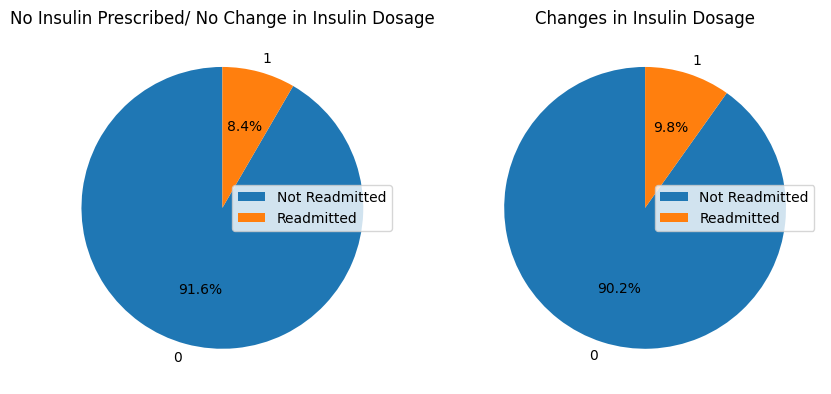

In [ ]:
# Filter the data for either no change in insulin dosage or no insulin prescribed
no_insulin_df = df2[df2['insulin'] == 0]

# Filter the data forc
insulin_df = df2[df2['insulin'] == 1]

# Create a 1x2 grid of subplots
fig, axes = plt.subplots(1, 2, figsize=(10, 10))

# Plot the first pie chart for  either no change in insulin dosage or no insulin prescribed
no_insulin_data = no_insulin_df['readmitted'].value_counts()
axes[0].pie(no_insulin_data, labels=no_insulin_data.index, autopct='%1.1f%%', startangle=90)
axes[0].legend(['Not Readmitted', 'Readmitted'])
axes[0].set_title('No Insulin Prescribed/ No Change in Insulin Dosage')

# Plot the second pie chart for change in insulin dosage
insulin_data = insulin_df['readmitted'].value_counts()
axes[1].pie(insulin_data, labels=insulin_data.index, autopct='%1.1f%%', startangle=90)
axes[1].legend(['Not Readmitted', 'Readmitted'])
axes[1].set_title('Changes in Insulin Dosage')

plt.show()


In [ ]:
# There is a possibility that the changes in insulin dosage may affect the likelihood of being readmitted. 

Glucose serum test result and Readmission¶
* '>200' : 1 = indicates diabetes
* '>300' : 1 = Indicates diabetes
* 'Norm' : 0 = Normal
* 'None' : -99 = test was not taken

Text(0.5, 1.0, 'Glucose test serum test result VS. Readmission')

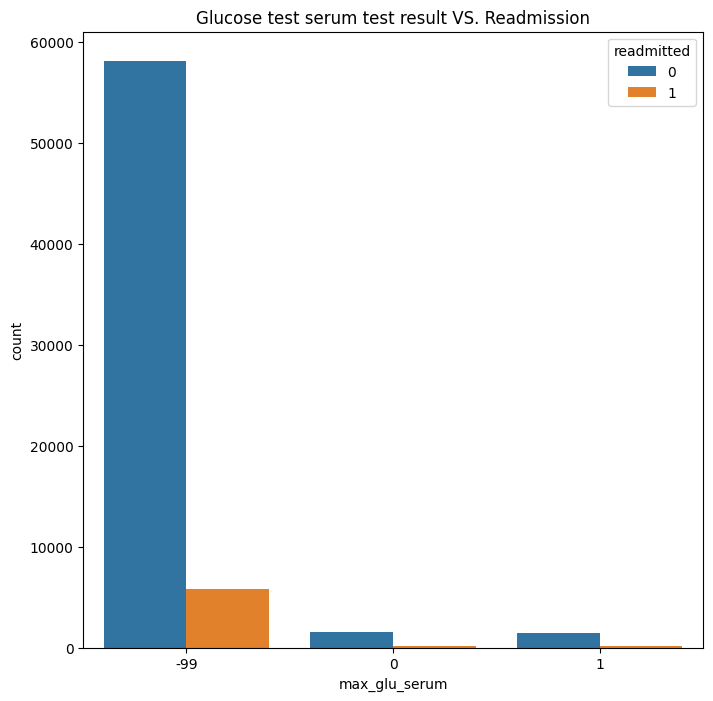

In [ ]:
fig = plt.figure(figsize=(8,8))
sns.countplot(x = df2['max_glu_serum'], hue = df2['readmitted']).set_title('Glucose test serum test result VS. Readmission')


In [ ]:
# The likelihood of patient readmission may increase if the glucose serum test, which measures blood glucose levels, is not conducted or skipped.

A1C result and Readmission

* '>7' : 1
* '>8' : 1
* Norm : 0 = Normal
* None : -99 = Test was not taken

Text(0.5, 1.0, 'A1C test result VS. Readmission')

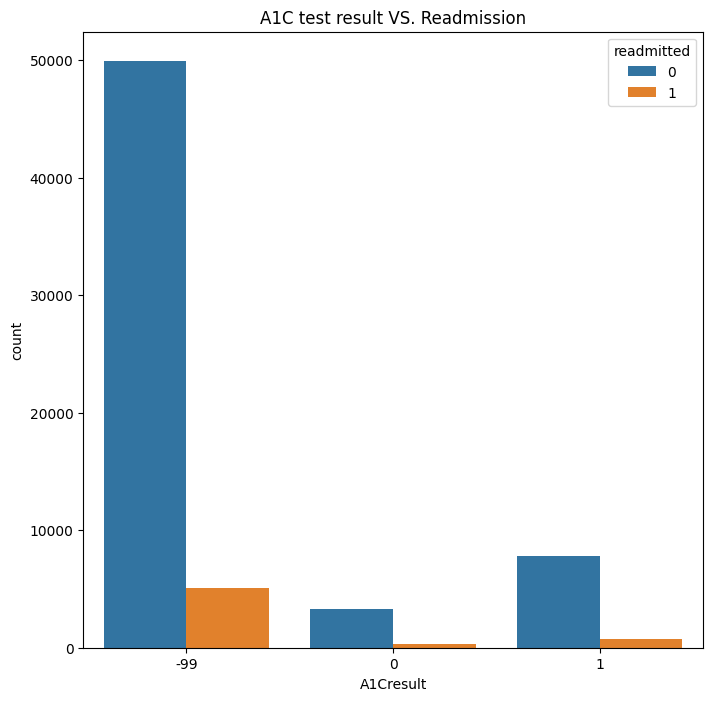

In [ ]:
fig = plt.figure(figsize=(8,8))
sns.countplot(x= df2['A1Cresult'], hue = df2['readmitted']).set_title('A1C test result VS. Readmission')

In [ ]:
# If the A1C test, which measures a person's average blood glucose levels over a period of time, is not conducted or omitted, it may potentially increase the likelihood of patient readmission. Also, patients are likely to be readmitted if the A1C result is abnormal.

Number of lab procedure and Readmission¶


Text(0.5, 1.0, 'Number of lab procedure VS. Readmission')

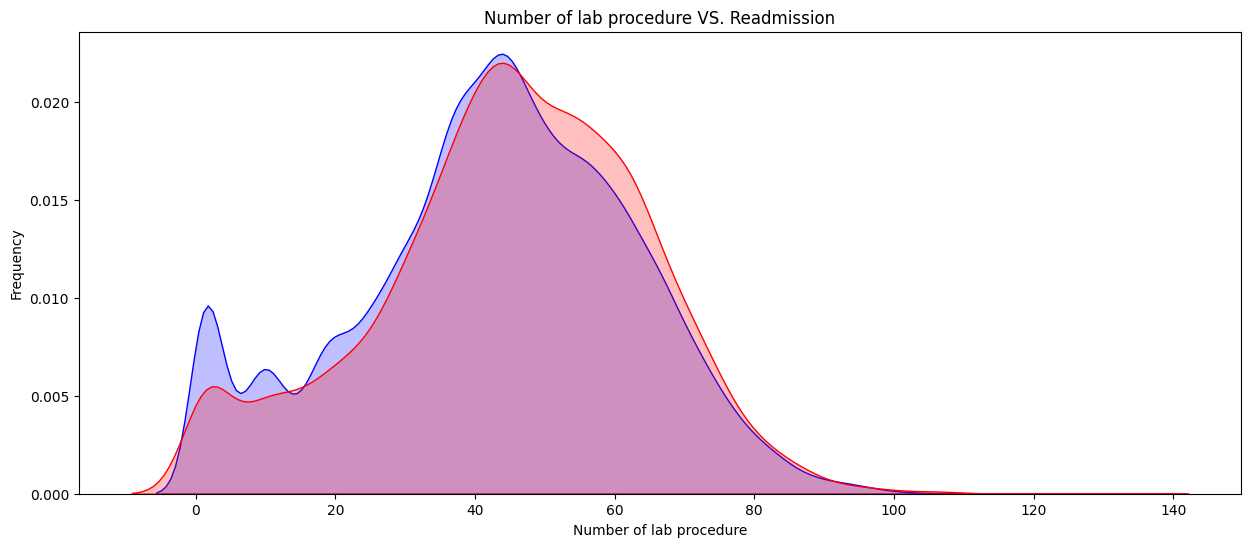

In [ ]:
fig = plt.figure(figsize=(15,6),)
ax=sns.kdeplot(df2.loc[(df2['readmitted'] == 0),'num_lab_procedures'] , color='b',fill=True,label='Not readmitted')
ax=sns.kdeplot(df2.loc[(df2['readmitted'] == 1),'num_lab_procedures'] , color='r',fill=True, label='readmitted')
ax.set(xlabel='Number of lab procedure', ylabel='Frequency')
plt.title('Number of lab procedure VS. Readmission')

In [ ]:
# There's no potential differences between patients who were readmitted and those who were not readmitted

In [ ]:
sns.pairplot(df2)

Correlation Matrix

In [ ]:
corr=df2.corr()
corr

<ipython-input-81-46bd13ade851>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr=df2.corr()


gender  admission_type_id  \
gender                    1.000000           0.010175   
admission_type_id         0.010175           1.000000   
discharge_disposition_id  0.000969           0.082219   
admission_source_id      -0.001126          -0.172366   
time_in_hospital         -0.024037          -0.028067   
num_lab_procedures        0.006126          -0.133491   
num_procedures            0.069463           0.122386   
num_medications          -0.012726           0.117515   
number_outpatient        -0.015643           0.049349   
number_emergency         -0.019749          -0.015145   
number_inpatient         -0.001533           0.024824   
number_diagnoses          0.000469          -0.111215   
max_glu_serum            -0.002039           0.400039   
A1Cresult                 0.022139          -0.073466   
metformin                 0.003372           0.013951   
repaglinide              -0.001757          -0.014273   
nateglinide              -0.004204          -0.011353   
chlorpropamide            0.003072           0.010250   
glimepiride              -0.001210          -0.012123   
acetohexamide            -0.003610          -0.002391   
glipizide                 0.029189           0.010134   
glyburide                 0.034624           0.000958   
tolbutamide               0.001035           0.004475   
pioglitazone              0.010877           0.010164   
rosiglitazone             0.012781           0.009511   
acarbose                  0.007781           0.007618   
miglitol                  0.001157          -0.001903   
troglitazone              0.007148           0.002343   
tolazamide                0.005756           0.010696   
insulin                   0.000787          -0.043740   
glyburide-metformin       0.001139          -0.006165   
glipizide-metformin       0.005071          -0.002081   
glimepiride-pioglitazone       NaN                NaN   
metformin-rosiglitazone        NaN                NaN   
metformin-pioglitazone   -0.003610           0.003224   
change                    0.019517          -0.002778   
diabetesMed               0.018904          -0.009644   
readmitted               -0.002333          -0.002973   
numchange                 0.013486           0.005049   
age_group                -0.053119          -0.006081   

                          discharge_disposition_id  admission_source_id  \
gender                                    0.000969            -0.001126   
admission_type_id                         0.082219            -0.172366   
discharge_disposition_id                  1.000000            -0.009629   
admission_source_id                      -0.009629             1.000000   
time_in_hospital                          0.059058             0.017964   
num_lab_procedures                        0.002112             0.186459   
num_procedures                            0.016538            -0.191434   
num_medications                           0.010402            -0.110216   
number_outpatient                        -0.040142            -0.007466   
number_emergency                         -0.033551             0.060526   
number_inpatient                         -0.041908             0.030629   
number_diagnoses                         -0.055115             0.104907   
max_glu_serum                             0.019611             0.231063   
A1Cresult                                 0.002055             0.069691   
metformin                                -0.004884            -0.029175   
repaglinide                              -0.014146             0.007553   
nateglinide                              -0.018842            -0.012845   
chlorpropamide                            0.029631            -0.002790   
glimepiride                              -0.027967            -0.021348   
acetohexamide                            -0.000076             0.002628   
glipizide                                -0.019249             0.007382   
glyburide                               

<Axes: >

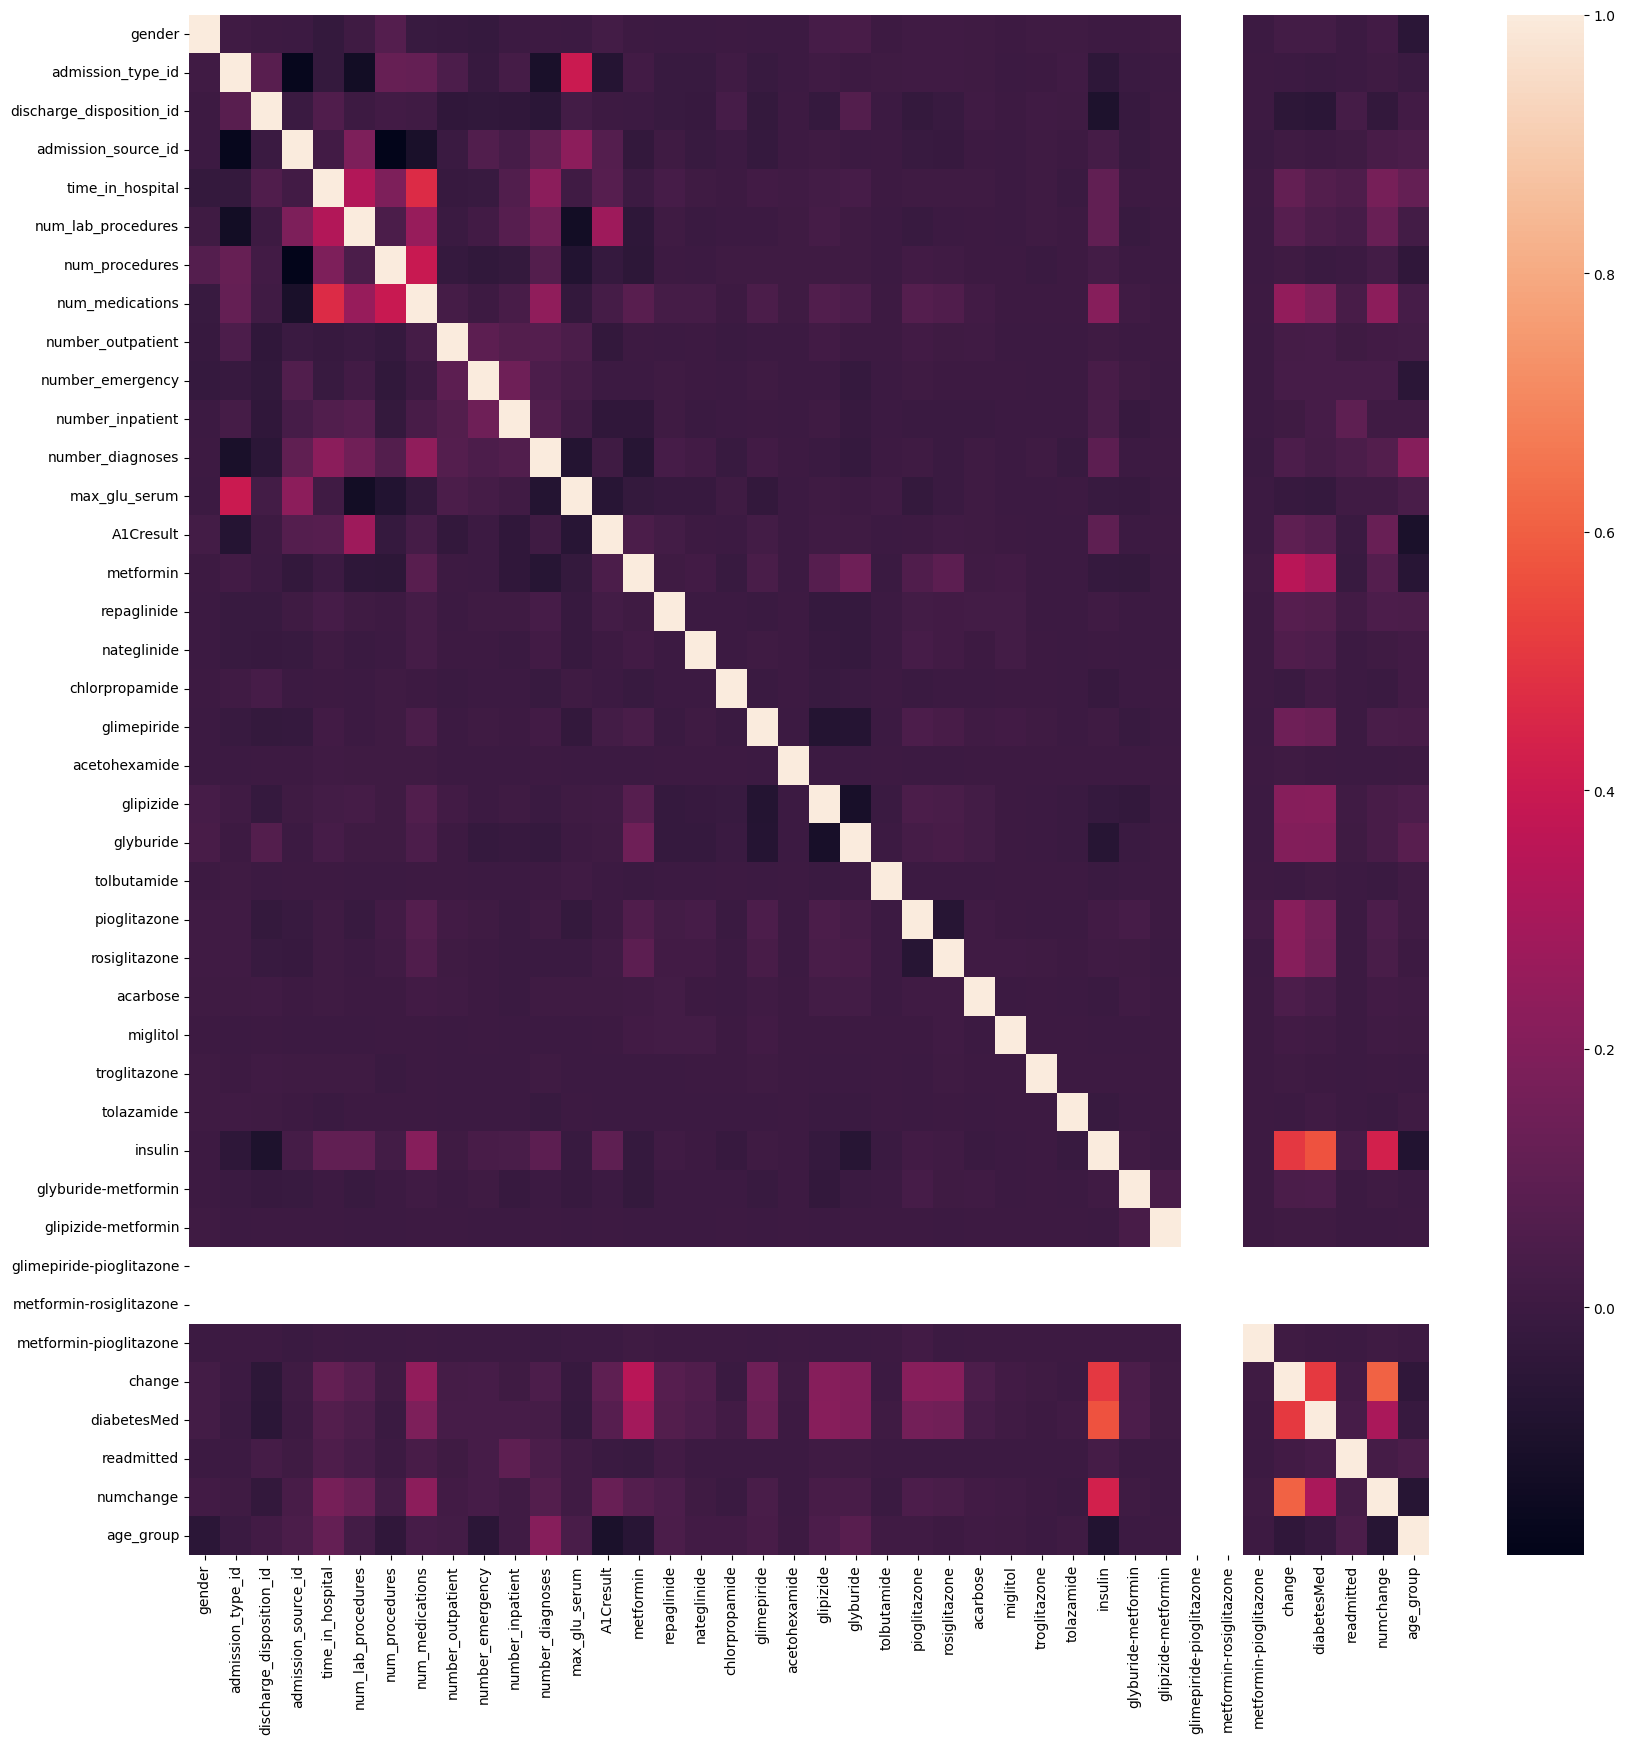

In [ ]:
f, ax = plt.subplots(figsize=(20, 20))
sns.heatmap(corr)

In [ ]:
# glimepiride-pioglitazone and metformin-rosiglitazone	only has one value, either 0 or 1

Correlation between Readmitted and other features

In [ ]:
corr = df2.corr()
readmitted_corr = corr['readmitted'].drop('readmitted')
readmitted_corr_sorted = readmitted_corr.sort_values(ascending=False)
print(readmitted_corr_sorted)


<ipython-input-84-1d34ac976526>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = df2.corr()


number_inpatient            0.100710
time_in_hospital            0.054338
age_group                   0.043488
number_diagnoses            0.042588
num_medications             0.035196
num_lab_procedures          0.031093
diabetesMed                 0.028184
number_emergency            0.027913
insulin                     0.025429
numchange                   0.022887
discharge_disposition_id    0.022848
change                      0.014222
repaglinide                 0.014195
glipizide                   0.010199
max_glu_serum               0.009791
number_outpatient           0.008651
admission_source_id         0.008346
glyburide                   0.004567
num_procedures             -0.000675
acetohexamide              -0.001222
metformin-pioglitazone     -0.001222
tolbutamide                -0.001536
troglitazone               -0.002117
gender                     -0.002333
miglitol                   -0.002468
acarbose                   -0.002504
pioglitazone               -0.002951
a

In [ ]:
# Correlation between readmitted and other variables are not significant, which is lower than 0.1 

##Pre-Modelling Data Processing

###Numerical features

In [ ]:
# listing all numerical features
numerics = df2.select_dtypes(include=np.number)
numerics.dtypes

gender                      int64
admission_type_id           int64
discharge_disposition_id    int64
admission_source_id         int64
time_in_hospital            int64
num_lab_procedures          int64
num_procedures              int64
num_medications             int64
number_outpatient           int64
number_emergency            int64
number_inpatient            int64
number_diagnoses            int64
max_glu_serum               int64
A1Cresult                   int64
metformin                   int64
repaglinide                 int64
nateglinide                 int64
chlorpropamide              int64
glimepiride                 int64
acetohexamide               int64
glipizide                   int64
glyburide                   int64
tolbutamide                 int64
pioglitazone                int64
rosiglitazone               int64
acarbose                    int64
miglitol                    int64
troglitazone                int64
tolazamide                  int64
insulin       

###Categorical Features

One-Hot encoding technique is used when the features are nominal (do not have any order). In one hot encoding, for every categorical feature, a new variable is created. Categorical features are mapped with a binary variable containing either 0 or 1. Here, 0 represents the absence, and 1 represents the presence of that category.

These newly created binary features are known as Dummy variables. This is also known as Dummy encoding. Now the number of dummy variables depends on the number of categories present.

In [ ]:
# listing all categorical columns
categoricals = df2.select_dtypes(exclude=np.number)
categoricals.dtypes

race        object
diag_1      object
diag_2      object
diag_3      object
med_spec    object
dtype: object

In [ ]:
categoricals = pd.get_dummies(categoricals, drop_first = True)

In [ ]:
categoricals.head().T

1  2  3  4  5
race_Asian                           0  0  0  0  0
race_Caucasian                       1  0  1  1  1
race_Hispanic                        0  0  0  0  0
race_Other                           0  0  0  0  0
diag_1_Diabetes                      0  0  0  0  0
diag_1_Digestive                     0  0  0  0  0
diag_1_Genitourinary                 0  0  0  0  0
diag_1_Injury                        0  0  0  0  0
diag_1_Musculoskeletal               0  0  0  0  0
diag_1_Neoplasms                     0  0  0  1  0
diag_1_Other                         1  1  1  0  0
diag_1_Respiratory                   0  0  0  0  0
diag_2_Diabetes                      0  1  0  0  0
diag_2_Digestive                     0  0  0  0  0
diag_2_Genitourinary                 0  0  0  0  0
diag_2_Injury                        0  0  0  0  0
diag_2_Musculoskeletal               0  0  0  0  0
diag_2_Neoplasms                     0  0  0  1  0
diag_2_Other                         1  0  1  0  0
diag_2_Respiratory                   0  0  0  0  0
diag_3_Diabetes                      0  0  0  1  1
diag_3_Digestive                     0  0  0  0  0
diag_3_Genitourinary                 0  0  0  0  0
diag_3_Injury                        0  0  0  0  0
diag_3_Musculoskeletal               0  0  0  0  0
diag_3_Neoplasms                     0  0  0  0  0
diag_3_Other                         1  1  0  0  0
diag_3_Respiratory                   0  0  0  0  0
med_spec_Cardiology                  0  0  0  0  0
med_spec_Emergency/Trauma            0  0  0  0  0
med_spec_Family/GeneralPractice      0  0  0  0  0
med_spec_InternalMedicine            0  0  0  0  0
med_spec_Nephrology                  0  0  0  0  0
med_spec_Orthopedics                 0  0  0  0  0
med_spec_Orthopedics-Reconstructive  0  0  0  0  0
med_spec_Other                       0  0  0  0  0
med_spec_Radiologist                 0  0  0  0  0
med_spec_Surgery-General             0  0  0  0  0

#Train Test Splitting

In [ ]:
# creating X and y dataframe
X = pd.concat([numerics, categoricals], axis = 1)
X = X.drop(['readmitted'], axis=1)
y = df2['readmitted']

In [ ]:
# standardize features by removing the mean and scaling to unit variance.
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X = pd.DataFrame(scaler.fit_transform(X), columns=X.columns)

In [ ]:
from sklearn.model_selection import train_test_split

# assume X is your feature matrix and y is your label vector
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


# print the sizes of the sets
print("Training set size:", len(X_train))
print("Test set size:", len(X_test))

Training set size: 46989
Test set size: 20139


# Outlier Detection

The Local Outlier Factor (LOF) algorithm is an unsupervised anomaly detection method which computes the local density deviation of a given data point with respect to its neighbors. It considers as outliers the samples that have a substantially lower density than their neighbors. 

We will use LOF to identify outliers present in the dataset and remove them.

In [ ]:
# checking the shape of train dataset
print(X_train.shape, y_train.shape)

(46989, 77) (46989,)


In [ ]:
from sklearn.neighbors import LocalOutlierFactor

# Identify outliers in the training dataset
lof = LocalOutlierFactor()
yhat = lof.fit_predict(X_train)

# Select all rows that are not outliers
mask = yhat != -1
X_train = X_train.loc[mask, :] # Use .loc to index by label (assuming X_train is a DataFrame)
y_train = y_train[mask] # Use the boolean mask for indexing y_train

# Summarize the shape of the updated training dataset
print(X_train.shape, y_train.shape)



(46574, 77) (46574,)


In [ ]:
y_train.value_counts()

0    42335
1     4239
Name: readmitted, dtype: int64

#Overcoming Class Imbalance using SMOTE + ENN Techniques

Based on this article, the best method to deal with imbalanced class is to apply resampling techniques so as the models perform to their best and give most of the accurate predictions.

More info: https://www.analyticsvidhya.com/blog/2020/10/overcoming-class-imbalance-using-smote-techniques/

In this code, SMOTE is used to oversample the minority class, ENN is used to remove some noisy samples from both classes, and RandomUnderSampler is used to randomly undersample the majority class to match the number of samples in the minority class. This should give us exactly equal numbers of samples for both classes after resampling.





In [ ]:
from imblearn.combine import SMOTEENN
from imblearn.under_sampling import RandomUnderSampler
from imblearn.under_sampling import EditedNearestNeighbours
from imblearn.over_sampling import SMOTE
from collections import Counter

counter = Counter(y_train)
print('Before', counter)

# oversampling the train dataset using SMOTE + ENN
smote = SMOTE(sampling_strategy='minority')
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

enn = EditedNearestNeighbours(sampling_strategy='majority')
X_train_smote_enn, y_train_smote_enn = enn.fit_resample(X_train_smote, y_train_smote)

rus = RandomUnderSampler(sampling_strategy='majority')
X_train_smenn, y_train_smenn = rus.fit_resample(X_train_smote_enn, y_train_smote_enn)

counter = Counter(y_train_smenn)
print('After', counter)


Before Counter({0: 42335, 1: 4239})
After Counter({0: 24139, 1: 24139})


In [ ]:
X_train1, X_test1, y_train1, y_test1 = train_test_split(X_train_smenn, y_train_smenn, test_size=0.3, random_state=24)


# print the sizes of the sets
print("Training set size:", len(X_train1))
print("Test set size:", len(X_test1))

Training set size: 33794
Test set size: 14484


# Logistic Regression
Logistic regression is a traditional machine learning model that fits a linear decision boundary between the positive and negative samples. This linear function is then passed through a sigmoid function to calculate the probability of the positive class. Logistic regression is an excellent model to use when the features are linearly separable. 


In [ ]:
from sklearn.linear_model import LogisticRegression

logit = LogisticRegression(fit_intercept=True, penalty='l2')
logit.fit(X_train1, y_train1)

LogisticRegression()

In [ ]:
y_pred1 = logit.predict(X_test1)

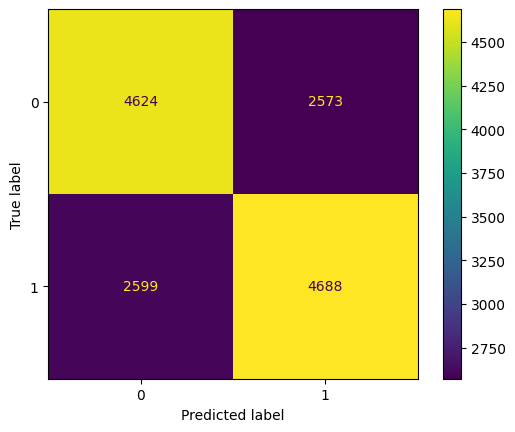

In [ ]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay

# Calculate confusion matrix
cm1 = confusion_matrix(y_test1, y_pred1)

# Create ConfusionMatrixDisplay object
cm1_display = ConfusionMatrixDisplay(cm1, display_labels=[0, 1])

# Plot the confusion matrix with percentages inside
cm1_display.plot(include_values=True)


In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score

print("Accuracy is {0:.2f}".format(accuracy_score(y_test1, y_pred1)))
print("Precision is {0:.2f}".format(precision_score(y_test1, y_pred1)))
print("Recall is {0:.2f}".format(recall_score(y_test1, y_pred1)))

Accuracy is 0.64
Precision is 0.65
Recall is 0.64


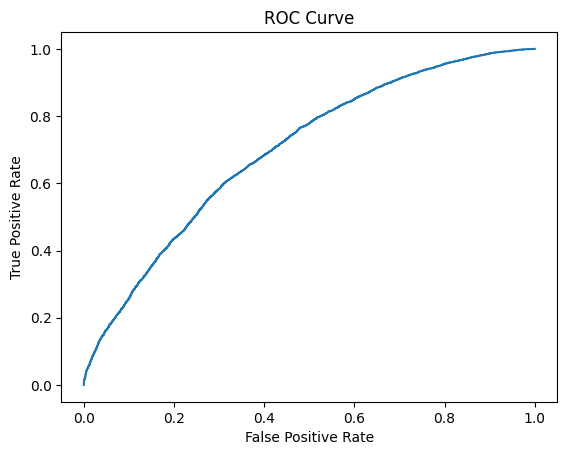

AUC Score: 0.70


In [ ]:
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt

# calculate predicted probabilities for X_test1
y_proba1 = logit.predict_proba(X_test1)[:, 1]

# calculate fpr, tpr and threshold values for various thresholds
fpr, tpr, thresholds = roc_curve(y_test1, y_proba1)

# plot ROC curve
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.show()

# calculate AUC score
auc_score = roc_auc_score(y_test1, y_proba1)
print("AUC Score: {:.2f}".format(auc_score))


#Decision Tree

Decision tree is a type of supervised learning algorithm and is mostly used in classification problems. This algorithm involves splitting the population or sample into two or more subpopulation based on most significant splitter in input variables.


In [ ]:
X_train2, X_test2, y_train2, y_test2 = train_test_split(X_train_smenn, y_train_smenn, test_size=0.3, random_state=12)


# print the sizes of the sets
print("Training set size:", len(X_train2))
print("Test set size:", len(X_test2))

Training set size: 33794
Test set size: 14484


In [ ]:
from sklearn.tree import DecisionTreeClassifier
dtree = DecisionTreeClassifier(max_depth=28, criterion = "entropy", min_samples_split=10)
dtree.fit(X_train2, y_train2)

DecisionTreeClassifier(criterion='entropy', max_depth=28, min_samples_split=10)

In [ ]:
y_pred2 = dtree.predict(X_test2)

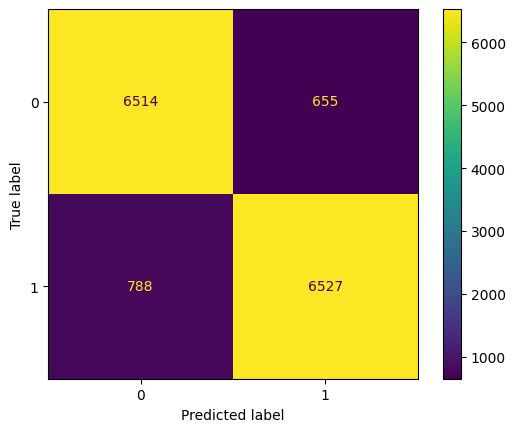

In [ ]:
# Calculate confusion matrix
cm2 = confusion_matrix(y_test2, y_pred2)

# Create ConfusionMatrixDisplay object
cm2_display = ConfusionMatrixDisplay(cm2, display_labels=[0, 1])

# Plot the confusion matrix with percentages inside
cm2_display.plot(include_values=True)

In [ ]:
print("Accuracy is {0:.2f}".format(accuracy_score(y_test2, y_pred2)))
print("Precision is {0:.2f}".format(precision_score(y_test2, y_pred2)))
print("Recall is {0:.2f}".format(recall_score(y_test2, y_pred2)))


Accuracy is 0.90
Precision is 0.91
Recall is 0.89


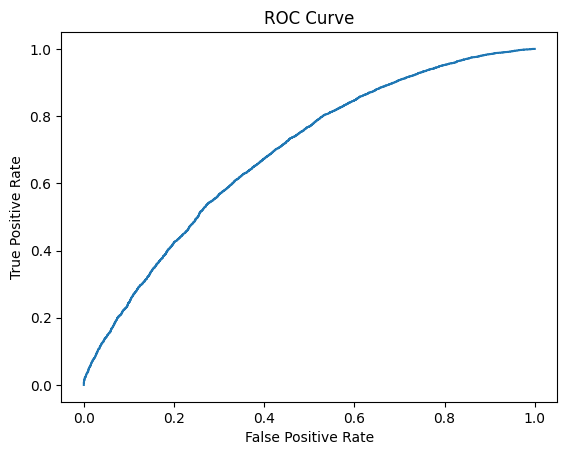

AUC Score: 0.69


In [ ]:
# calculate predicted probabilities for X_test1
y_proba2 = logit.predict_proba(X_test2)[:, 1]

# calculate fpr, tpr and threshold values for various thresholds
fpr, tpr, thresholds = roc_curve(y_test2, y_proba2)

# plot ROC curve
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.show()

# calculate AUC score
auc_score = roc_auc_score(y_test2, y_proba2)
print("AUC Score: {:.2f}".format(auc_score))


                     Feature  Importance
57              diag_2_Other    0.013681
6             num_procedures    0.015797
11          number_diagnoses    0.016094
7            num_medications    0.026790
5         num_lab_procedures    0.027589
0                     gender    0.035818
10          number_inpatient    0.095687
38                 age_group    0.116747
2   discharge_disposition_id    0.204587
4           time_in_hospital    0.274178


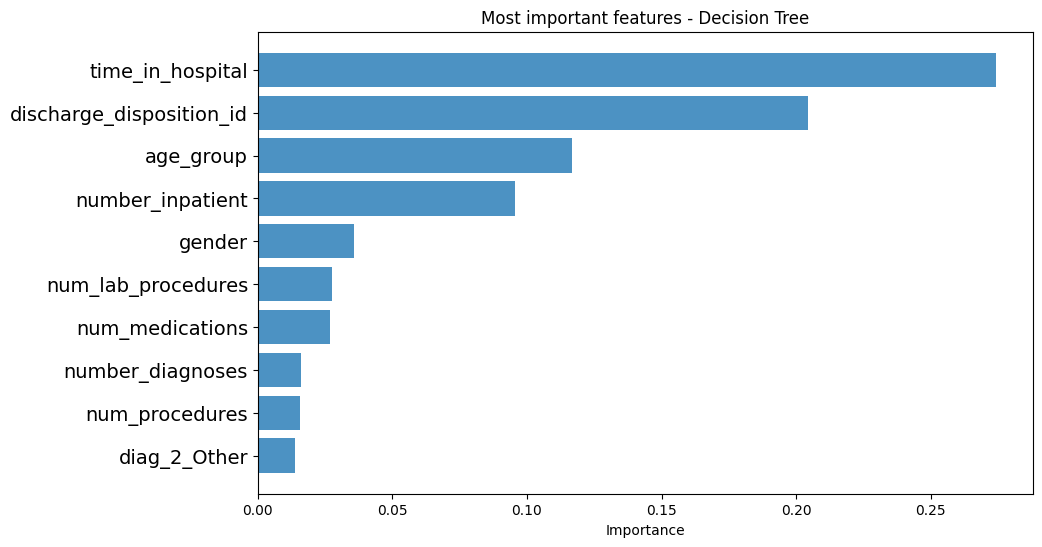

In [ ]:
# Create list of top most features based on importance
feature_names = X_train.columns
feature_imports = dtree.feature_importances_
most_imp_features = pd.DataFrame([f for f in zip(feature_names,feature_imports)], columns=["Feature", "Importance"]).nlargest(10, "Importance")
most_imp_features.sort_values(by="Importance", inplace=True)
print(most_imp_features)
plt.figure(figsize=(10,6))
plt.barh(range(len(most_imp_features)), most_imp_features.Importance, align='center', alpha=0.8)
plt.yticks(range(len(most_imp_features)), most_imp_features.Feature, fontsize=14)
plt.xlabel('Importance')
plt.title('Most important features - Decision Tree')
plt.show()

#Random Forest

Random Forest algorithm is a variant of decision tree algorithm. The algorithm involves constructing a multitude of decision trees at training time and outputting a result that is the mode class or mean prediction of the individual trees. This makes random forest very accurate and popular among data people.



In [ ]:
X_train3, X_test3, y_train3, y_test3 = train_test_split(X_train_smenn, y_train_smenn, test_size=0.3, random_state=21)


# print the sizes of the sets
print("Training set size:", len(X_train3))
print("Test set size:", len(X_test3))

Training set size: 33794
Test set size: 14484


In [ ]:
from sklearn.ensemble import RandomForestClassifier
rm = RandomForestClassifier(n_estimators = 10, max_depth=25, criterion = "gini", min_samples_split=10)
rm.fit(X_train3, y_train3)

RandomForestClassifier(max_depth=25, min_samples_split=10, n_estimators=10)

In [ ]:
y_pred3 = rm.predict(X_test3)

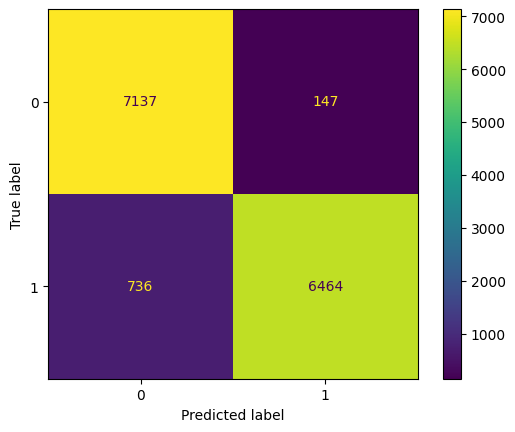

In [ ]:
# Calculate confusion matrix
cm3 = confusion_matrix(y_test3, y_pred3)

# Create ConfusionMatrixDisplay object
cm3_display = ConfusionMatrixDisplay(cm3, display_labels=[0, 1])

# Plot the confusion matrix with percentages inside
cm3_display.plot(include_values=True)

In [ ]:
print("Accuracy is {0:.2f}".format(accuracy_score(y_test3, y_pred3)))
print("Precision is {0:.2f}".format(precision_score(y_test3, y_pred3)))
print("Recall is {0:.2f}".format(recall_score(y_test3, y_pred3)))


Accuracy is 0.94
Precision is 0.98
Recall is 0.90


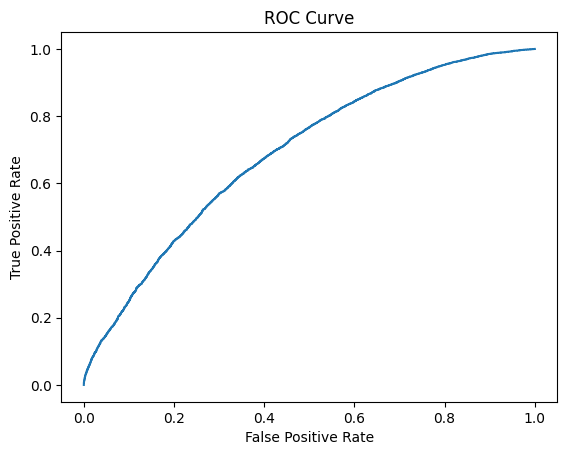

AUC Score: 0.69


In [ ]:
# calculate predicted probabilities for X_test1
y_proba3 = logit.predict_proba(X_test3)[:, 1]

# calculate fpr, tpr and threshold values for various thresholds
fpr, tpr, thresholds = roc_curve(y_test3, y_proba3)

# plot ROC curve
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.show()

# calculate AUC score
auc_score = roc_auc_score(y_test3, y_proba3)
print("AUC Score: {:.2f}".format(auc_score))


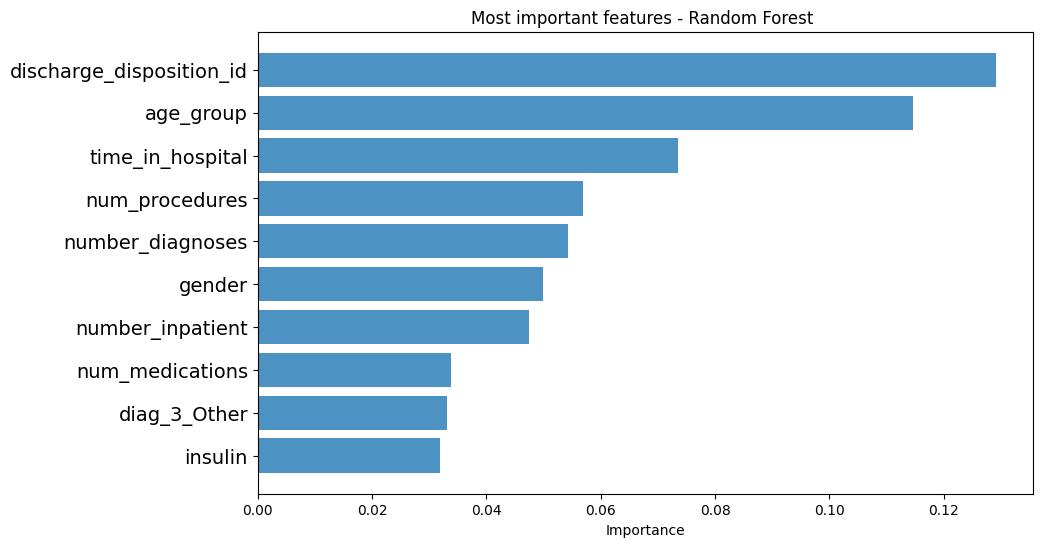

In [ ]:
# Create list of top most features based on importance
feature_names = X_train.columns
feature_imports = rm.feature_importances_
most_imp_features = pd.DataFrame([f for f in zip(feature_names,feature_imports)], columns=["Feature", "Importance"]).nlargest(10, "Importance")
most_imp_features.sort_values(by="Importance", inplace=True)
plt.figure(figsize=(10,6))
plt.barh(range(len(most_imp_features)), most_imp_features.Importance, align='center', alpha=0.8)
plt.yticks(range(len(most_imp_features)), most_imp_features.Feature, fontsize=14)
plt.xlabel('Importance')
plt.title('Most important features - Random Forest ')
plt.show()

#Model Comparision

In [ ]:
accuracy_logit = accuracy_score(y_test1, y_pred1)
precision_logit = precision_score(y_test1, y_pred1)
recall_logit = recall_score(y_test1, y_pred1)
auc_score_logit = roc_auc_score(y_test1, y_proba1)

In [ ]:
accuracy_dtree = accuracy_score(y_test2, y_pred2)
precision_dtree = precision_score(y_test2, y_pred2)
recall_dtree = recall_score(y_test2, y_pred2)
auc_score_dtree = roc_auc_score(y_test2, y_proba2)

In [ ]:
accuracy_rm = accuracy_score(y_test3, y_pred3)
precision_rm = precision_score(y_test3, y_pred3)
recall_rm = recall_score(y_test3, y_pred3)
auc_score_rm = roc_auc_score(y_test3, y_proba3)

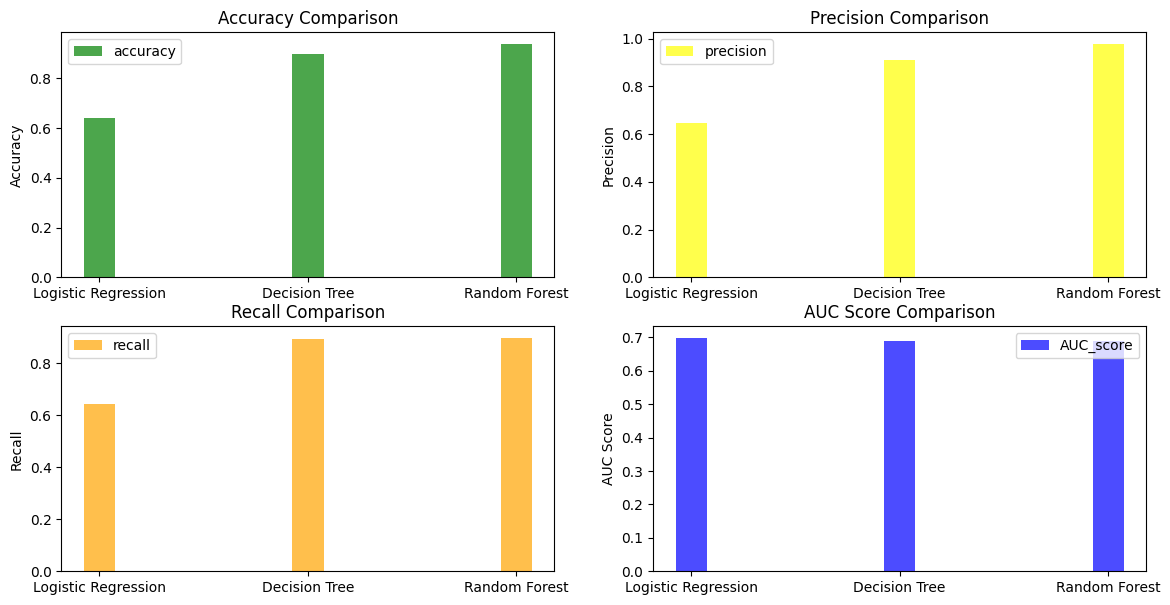

In [ ]:
# Define the models and their corresponding performance metric values
models = ['Logistic Regression', 'Decision Tree', 'Random Forest']
accuracy_values = [accuracy_logit, accuracy_dtree, accuracy_rm]
precision_values = [precision_logit, precision_dtree, precision_rm]
recall_values = [recall_logit, recall_dtree, recall_rm]
auc_score_values = [auc_score_logit, auc_score_dtree, auc_score_rm]

fig, axs = plt.subplots(2, 2, figsize=(14, 7))

# plot accuracy
axs[0, 0].bar(models, accuracy_values, align='center', width=0.15, alpha=0.7, color='green', label='accuracy')
axs[0, 0].set_xticks(models)
axs[0, 0].set_xticklabels(models)
axs[0, 0].set_ylabel('Accuracy')
axs[0, 0].set_title('Accuracy Comparison')
axs[0, 0].legend()

# plot precision
axs[0, 1].bar(models, precision_values, align='center', width=0.15, alpha=0.7, color='yellow', label='precision')
axs[0, 1].set_xticks(models)
axs[0, 1].set_xticklabels(models)
axs[0, 1].set_ylabel('Precision')
axs[0, 1].set_title('Precision Comparison')
axs[0, 1].legend()

# plot recall
axs[1, 0].bar(models, recall_values, align='center', width=0.15, alpha=0.7, color='orange', label='recall')
axs[1, 0].set_xticks(models)
axs[1, 0].set_xticklabels(models)
axs[1, 0].set_ylabel('Recall')
axs[1, 0].set_title('Recall Comparison')
axs[1, 0].legend()

# plot AUC score
axs[1, 1].bar(models, auc_score_values, align='center', width=0.15, alpha=0.7, color='blue', label='AUC_score')
axs[1, 1].set_xticks(models)
axs[1, 1].set_xticklabels(models)
axs[1, 1].set_ylabel('AUC Score')
axs[1, 1].set_title('AUC Score Comparison')
axs[1, 1].legend()

plt.show()


#Conclusions and Future Work

This study utilized a comprehensive dataset that included demographic, clinical procedure-related, diagnostic-related, and medication information for diabetic patients of all ages. The goal was to build a predictive model that could identify diabetic patients who are at a higher likelihood of being readmitted within 30 days. Findings from this study offers numerous benefits in healthcare. Early identification of high-risk patients allows for timely interventions and improved patient outcomes. Optimal resource allocation can be achieved by prioritizing high-risk patients, leading to efficient utilization of resources. Care coordination and patient engagement are enhanced, resulting in seamless transitions of care and improved satisfaction. Population health management strategies can be proactively implemented based on predictive analytics. Data-driven decision making can inform providers, administrators, and policymakers in optimizing care processes. Quality improvement initiatives can be targeted based on readmission data analysis. Cost savings can be achieved by preventing unnecessary readmissions. Responsible and ethical use of predictive models, in collaboration with clinical expertise, is crucial for safe and effective patient care. 


After analyzing three machine learning algorithms, namely Logistic Regression, Decision Tree, and Random Forest, in terms of accuracy, precision, recall, ROC curve, AUC and confusion matrix, it was determined that Random Forest performed the best, achieving an accuracy of 94%. The study identified key factors that influence readmission rates, such as discharge disposition, time in hospital, age, gender, number of procedures (other than lab tests) performed during the encounter, number of diagnoses entered to the system. Additionally, other crtical factors were also considered, such as number of inpatient visits of the patient in the year preceding the encounter, insulin dosage, number of distinct generic names administered during the encouter. The study recommends that hospitals focus not only on inpatient treatment but also on continued care after discharge, based on the findings of this analysis.

Our results are promising and the proposed algorithms could be applied to other samples from different sourse hospitals and different countries. A model deployment can be built for health professionals to use and predict the probability of readmission for a certain patient by inputting patient's information such as demographic, discharge disposition, number of procedures taken during inpatient visit, etc.

Future work should also focus on applying other machine learning algorithms using real- world dataset such as Support Vector Machines, Gradient Boosting Models, Deep Learning, Time-series Models. Lastly, differences between shorter (less than 30 days) and longer (more than 30 days) readmission timeframe should be investigated as a criteria in future experiments.


#References (APA7 style)

American Diabetes Association (Ed.). (2018, May). The cost of diabetes. The Cost of Diabetes | ADA. Retrieved April 23, 2023, from https://diabetes.org/about-us/statistics/cost-diabetes

American Diabetes Association. (2022, July 28). Statistics about diabetes. Statistics About Diabetes | ADA. Retrieved April 23, 2023, from https://diabetes.org/about-us/statistics/about-diabetes

Davis, S., Zhang, J., Lee, I., Rezaei, M., Greiner, R., McAlister, F. A., & Padwal, R. (2022). Effective hospital readmission prediction models using machine-learned features. BMC Health Services Research, 22(1). https://doi.org/10.1186/s12913-022-08748-y

Fernández Alberto, Krawczyk, B., García Salvador, Galar, M., Herrera, F., & Prati, R. C. (2018). Learning from imbalanced data sets. Springer.

Hosseinzadeh, A., Izadi, M., Verma, A., Precup, D., & Buckeridge, D. (2013). Assessing the predictability of hospital readmission using Machine Learning. Proceedings of the AAAI Conference on Artificial Intelligence, 27(2), 1532–1538. https://doi.org/10.1609/aaai.v27i2.18995

Kampan, P. (2006). Effects of Counseling and Implementation of Clinical Pathway on Diabetic Patients Hospitalized with Hypoglycemia.

Lin, C.-Y., Singh, H. S., Kar, R., & Raza, U. (2017). What Are Predictors of Medication Change and Hospital Readmission in Diabetic Patients?

Lu, H., & Uddin, S. (2022). Explainable stacking-based model for predicting hospital readmission for Diabetic patients. Information, 13(9), 436. https://doi.org/10.3390/info13090436

Michailidis, P., Dimitriadou, A., Papadimitriou, T., & Gogas, P. (2022). Forecasting hospital readmissions with machine learning. Healthcare, 10(6), 981. https://doi.org/10.3390/healthcare10060981

Ostling, S., Wyckoff, J., Ciarkowski, S. L., Pai, C.-W., Choe, H. M., Bahl, V., & Gianchandani, R. (2017). The relationship between diabetes mellitus and 30-day readmission rates. Clinical Diabetes and Endocrinology, 3(1). https://doi.org/10.1186/s40842-016-0040-x

Strack, B., DeShazo, J. P., Gennings, C., Olmo, J. L., Ventura, S., Cios, K. J., & Clore, J. N. (2014). Impact of hba1c measurement on hospital readmission rates: Analysis of 70,000 clinical database patient records. BioMed Research International, 2014, 1–11. https://doi.org/10.1155/2014/781670 
